# Project: Predict Heart Disease
  
Please note this complete notebook has been written and compiled by and belongs to the author, usage of the same allowed only with due attribution to the author.

Author info:  
Name: **Fardeen Ahmad Khan**  
Email: **fadmin@fkhan.co.in**

For Queries and Collab please contact through the above mail.

dataset original: https://archive.ics.uci.edu/ml/datasets/heart+Disease  
dataset from kaggle: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

#1. End to End Data Science Workflow

##1.1 Loading the Dataset and Initial Checks

Importing the necessary libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Loading the data set into a pandas dataframe

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Code Practice/Datasets/heart.csv')

Here's how our dataset looks like,
get first 5 rows using `data.head()`

In [ ]:
# @title
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Get detailed summary of each column using `data.info()`

In [ ]:
# @title
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


The data contains **14 columns** with **1025 records**

Displaying a statistical summary of each column using `data.describe()`

In [ ]:
# @title
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Checking the data for null values using `data.isnull().sum()`

In [ ]:
# @title
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The data has **no null values**

## 1.2 Exploratory Data Analysis - Univariate

### 1.2.1 Distribution of the feature Age

Displaying a value count of the feature age, this will help us to know what are the ages occuring most frequently in our data and to understand how our patients are distributed. This tells us if our population is young or older.

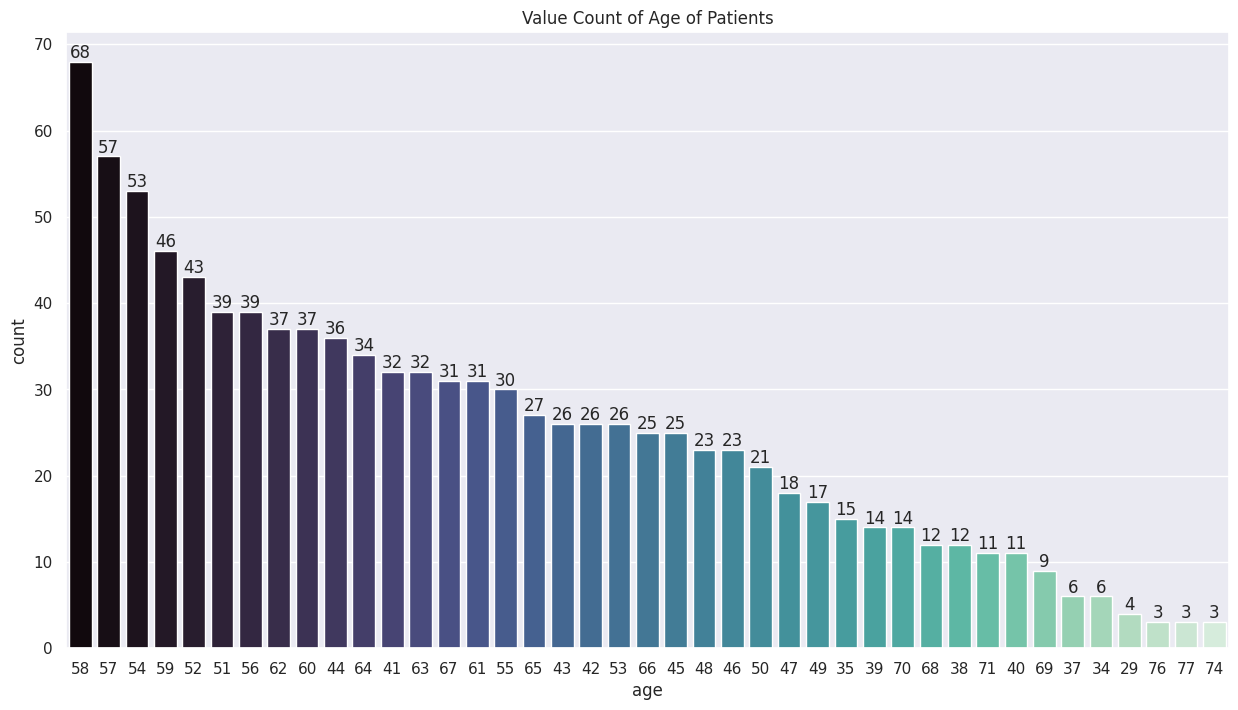

In [ ]:
# @title
plt.figure(figsize=(15,8),dpi=100)
p = sns.countplot(data=data,x=data["age"],order=data["age"].value_counts(ascending=False).index,palette="mako")
vals = data["age"].value_counts(ascending=False).values
plt.title("Value Count of Age of Patients")
p.bar_label(container=p.containers[0],labels=vals);

In [ ]:
# @title
data_mode = data["age"].mode()
data_mean = data["age"].mean()

Creating a distribution plot of the "Age" feature and drawing a line representing the mean.

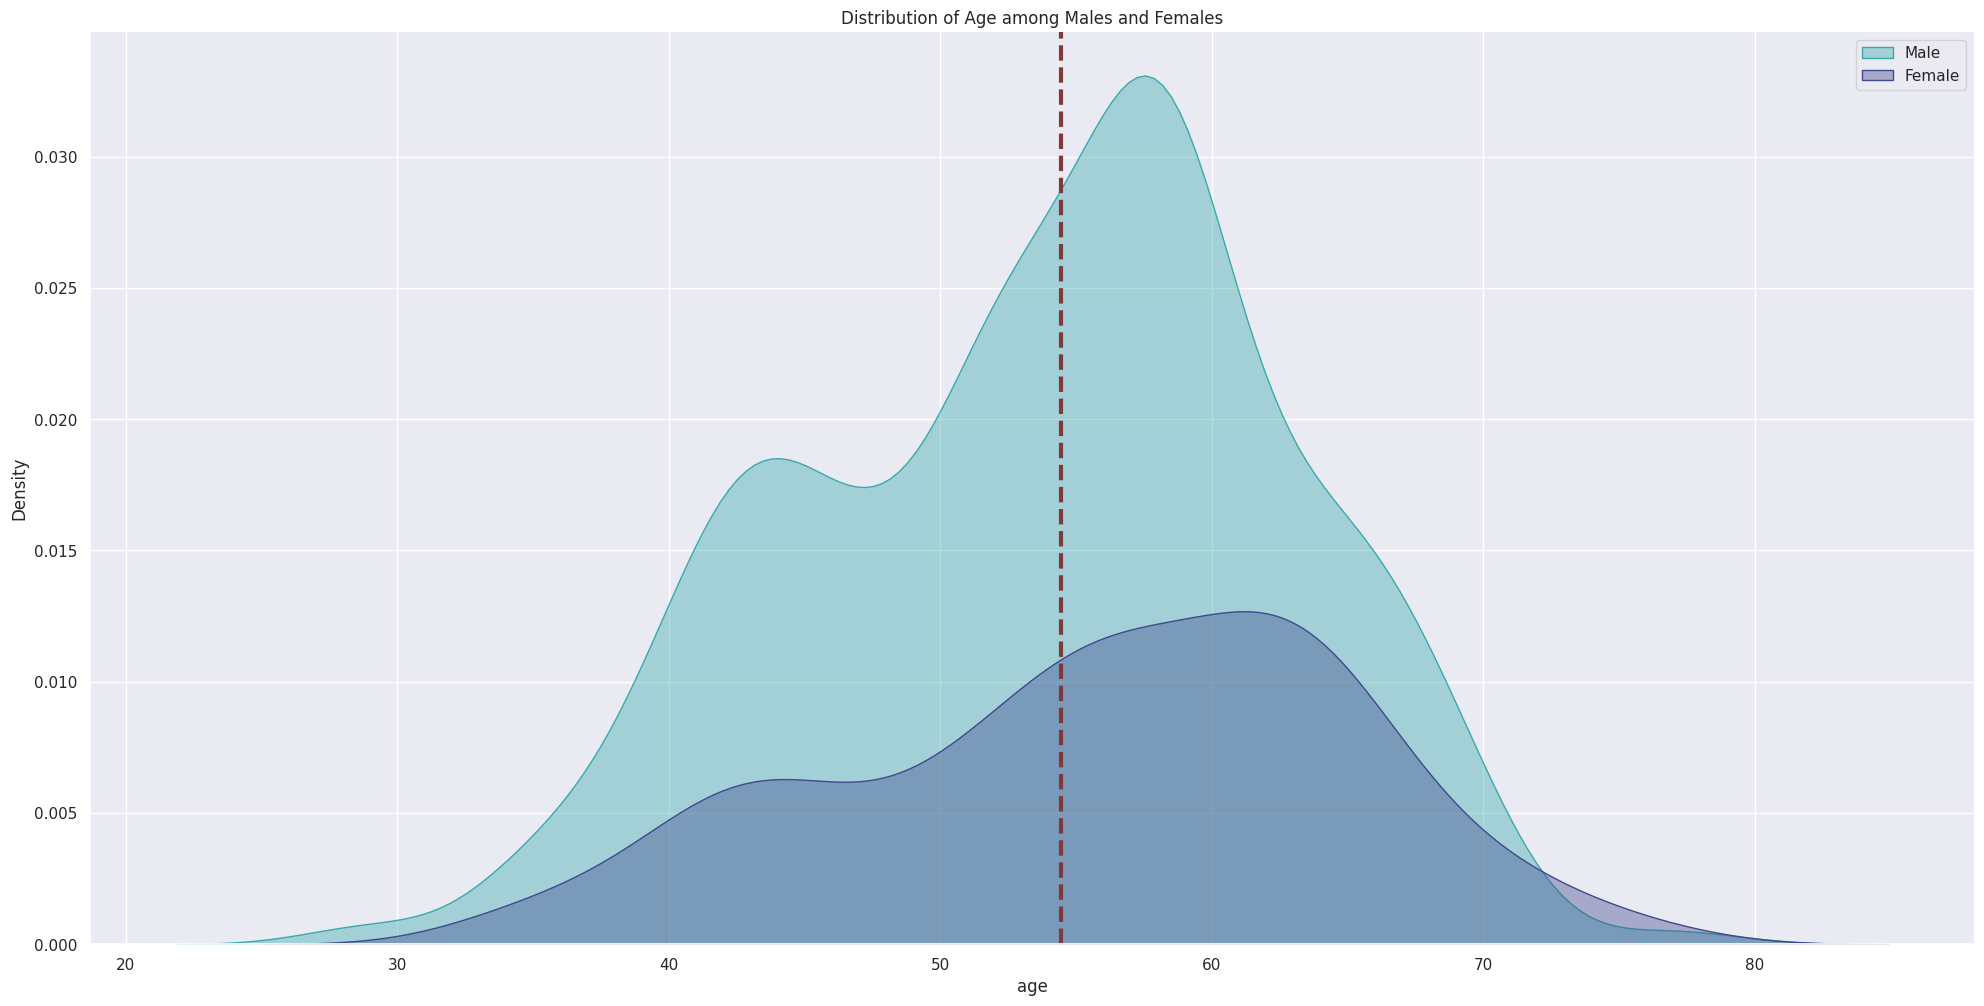

In [ ]:
# @title
#plt.figure(figsize=(15,8),dpi=100)
#sns.set(rc={'figure.figsize':(20,10)})
sns.displot(data=data,x=data["age"],kind='kde',height=10,aspect=2,alpha=0.4,linewidth=1,hue="sex",fill=True,legend=False,palette="mako")
#plt.axvline(data_mean, ls='--', linewidth=3, c='#82393A')
plt.axvline(x=data_mean, ls='--', linewidth=3, c='#82393A')
plt.title("Distribution of Age among Males and Females")
plt.legend(["Male","Female"]);

The feature age is **negatively skewed** as observed from the figure, wich means the **mean** is less than the **mode**. Of course this tells us that the data contains more elderly people than younger ones.

Plotting a **box plot** to understand the distribution of age more clearly and to see potential outliers

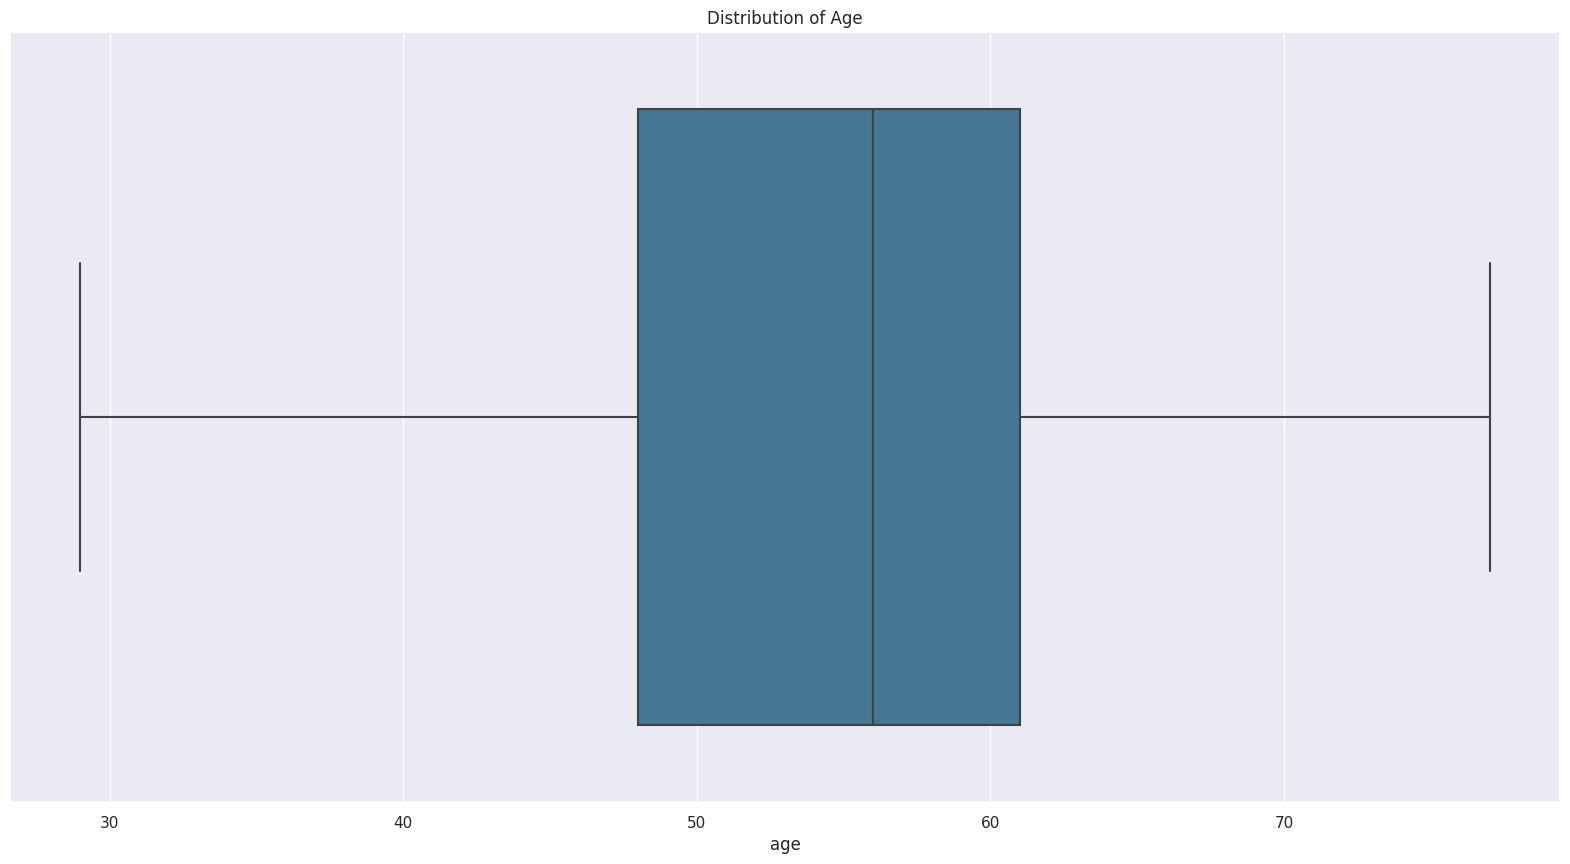

In [ ]:
# @title
plt.title("Distribution of Age");
sns.boxplot(data=data,x=data["age"],palette="mako",saturation=0.7);

The feaure **age** has most of the values **distributed between 40 and 68**

### 1.2.2 Analyzing the feature Sex

In [ ]:
# @title
data["sex"].value_counts() # 0 is female and 1 is male

In [ ]:
# @title
males = 713/1025*100
females = 312/1025*100
print(f"There are {males:.2f}% males in the Dataset")
print(f"There are {females:.2f}% females in the Dataset")

Plotting the count of Males and Females in the Data set.

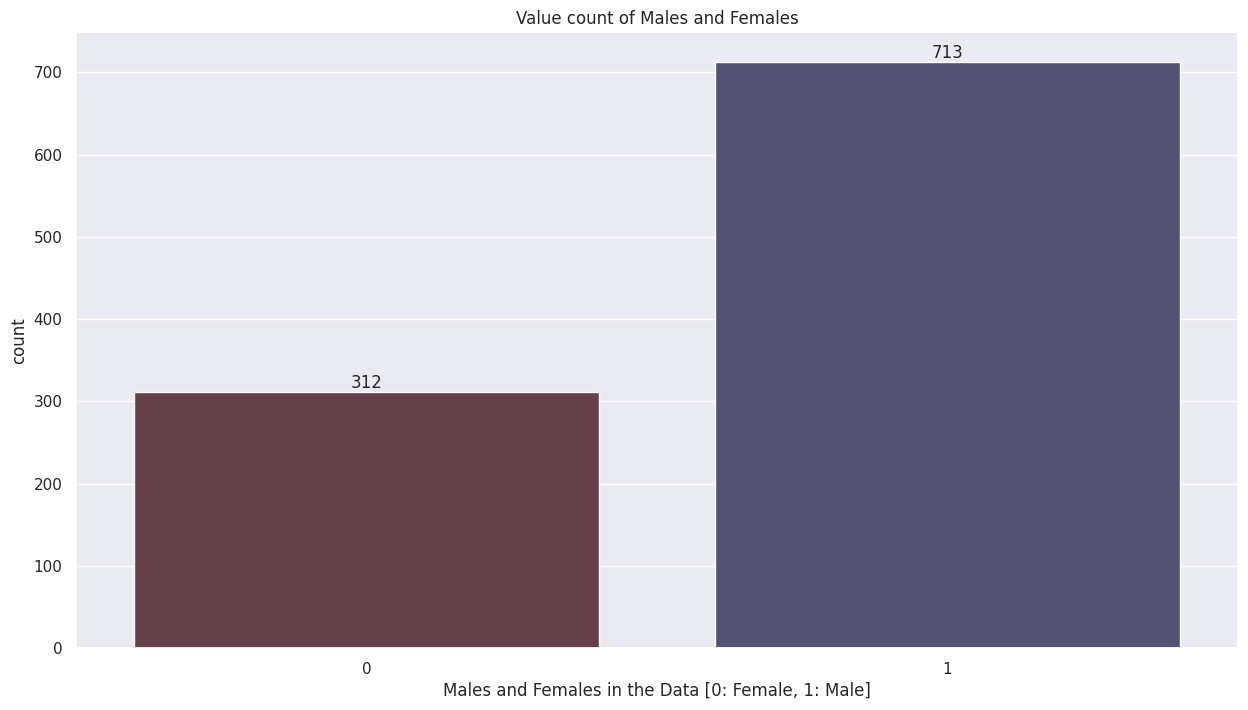

In [ ]:
# @title
plt.figure(figsize=(15,8),dpi=100)
p = sns.countplot(data=data,x=data["sex"],palette="icefire_r",saturation=0.5)
vals = data["sex"].value_counts(ascending=True).values
p.bar_label(container=p.containers[0],labels=vals)
plt.title("Value count of Males and Females")
plt.xlabel("Males and Females in the Data [0: Female, 1: Male]");

There are **69.56% males** in the Dataset
and **30.44% females** in the Dataset

### 1.2.3 Analyzing the feature "Types of Chest Pain" (cp)

In [ ]:
# @title
data["cp"].value_counts()

Plotting a Count Plot for the types of chest pain.

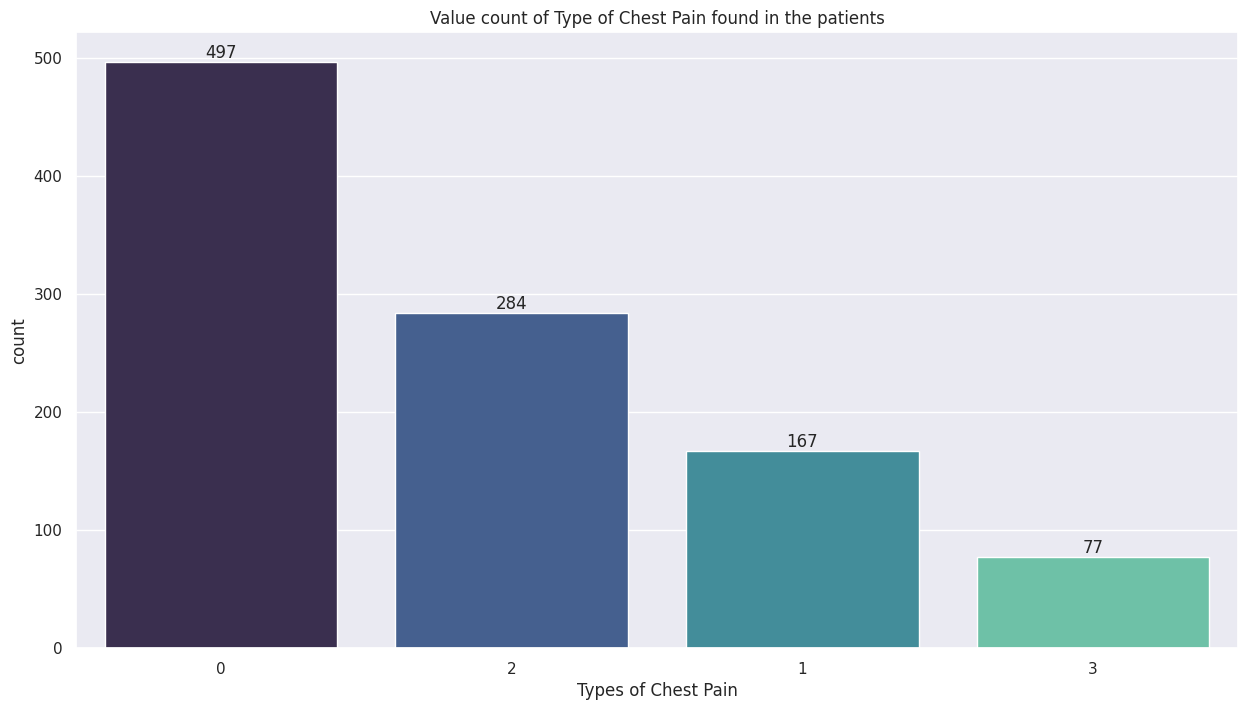

In [ ]:
# @title
plt.figure(figsize=(15,8),dpi=100)
p = sns.countplot(data=data,x=data["cp"],palette="mako",order=data['cp'].value_counts(ascending=False).index)
vals = data["cp"].value_counts().values
p.bar_label(container=p.containers[0],labels=vals)
plt.title("Value count of Type of Chest Pain found in the patients")
plt.xlabel("Types of Chest Pain");

The type of **chest pain** which is **found most** in the patients is **type 0** followed by **type 2** and **type 1**. **type 3** is the least found chest pain.

### 1.2.4 Analyzing the feature "Resting Blood Pressure" (trestbps)

Plotting the distribution of Resting Blood Pressure in Males and Females with a line depicting the mean.

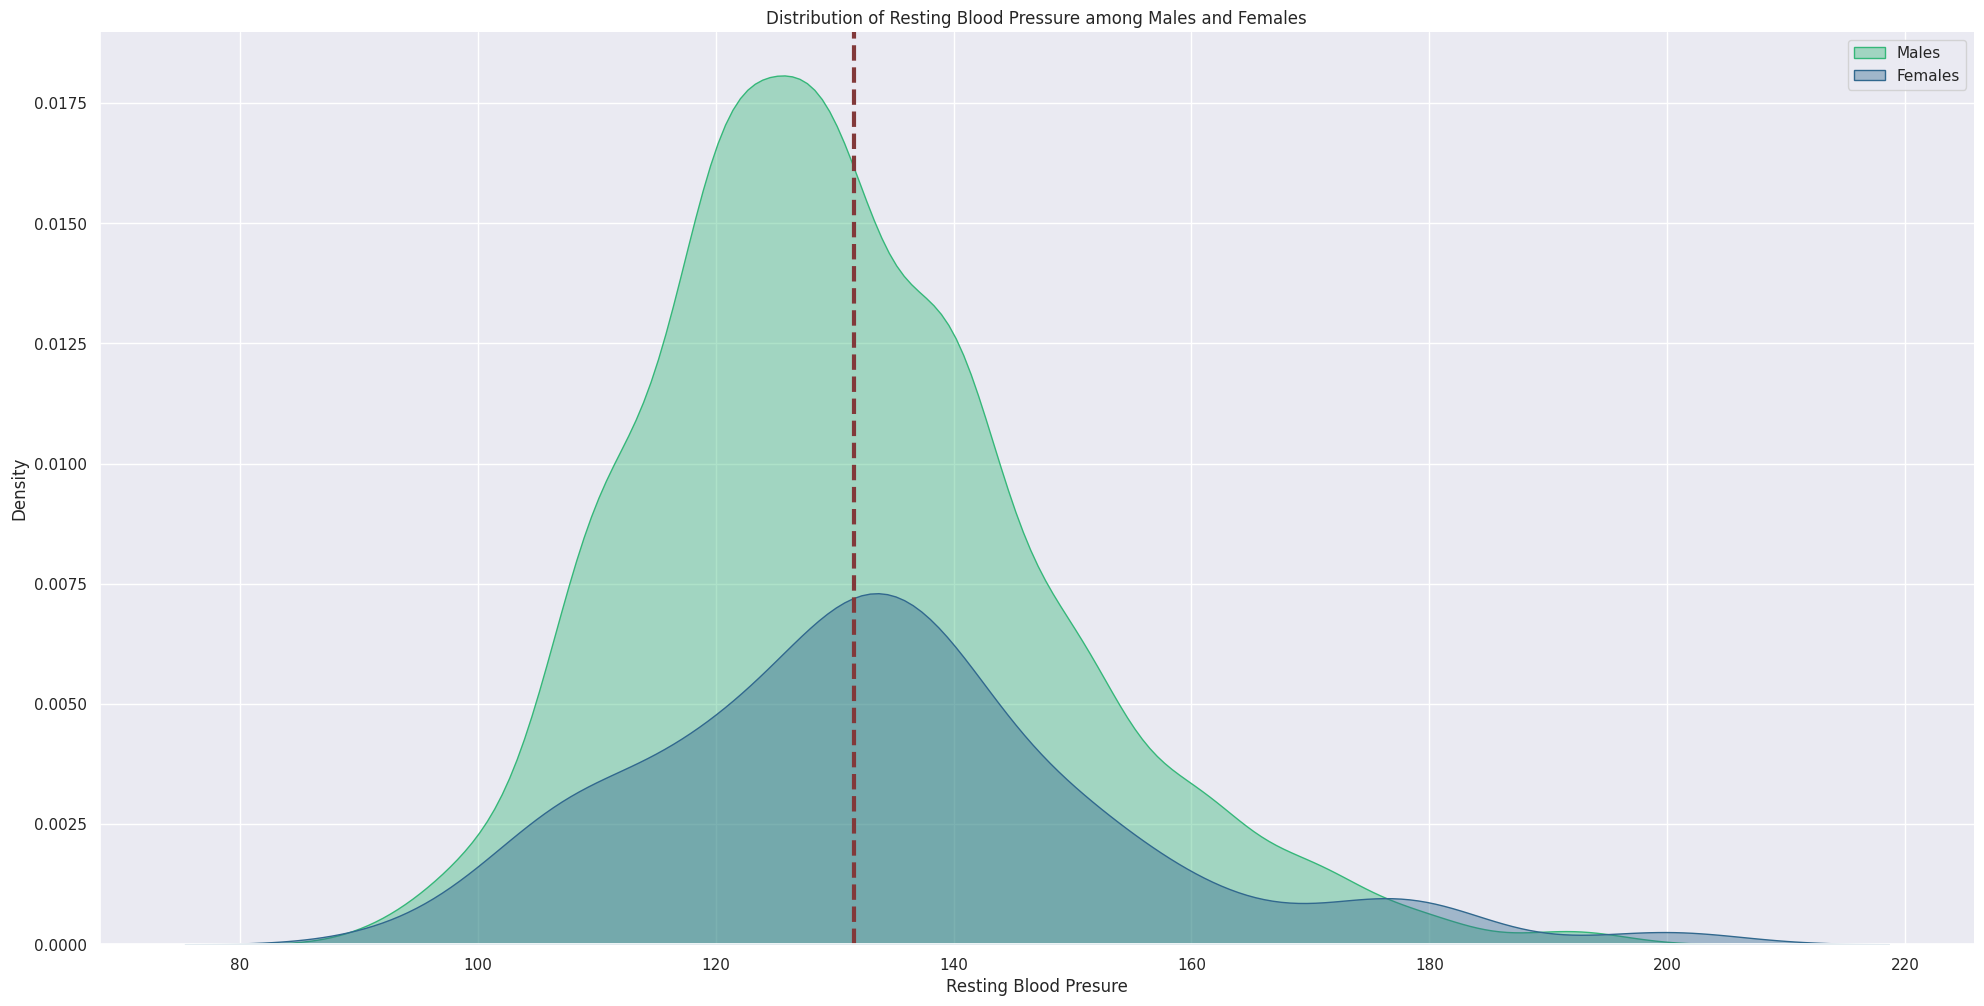

In [ ]:
# @title
sns.displot(data=data,x=data["trestbps"],kind='kde',height=10,aspect=2,alpha=0.4,linewidth=1,hue="sex",fill=True,legend=False,palette="viridis")
plt.xlabel("Resting Blood Presure")
plt.axvline(x=data["trestbps"].mean(), ls='--', linewidth=3, c='#82393A')
plt.legend(["Males","Females"])
plt.title("Distribution of Resting Blood Pressure among Males and Females");

The data clearly shows that for **males** the data is **positively skewed** and for **females** the data is slightly **negatively skewed** but mostly follows a **normal distribution**

Analyzing the distribution of Resting Blood Pressure using a boxplot.

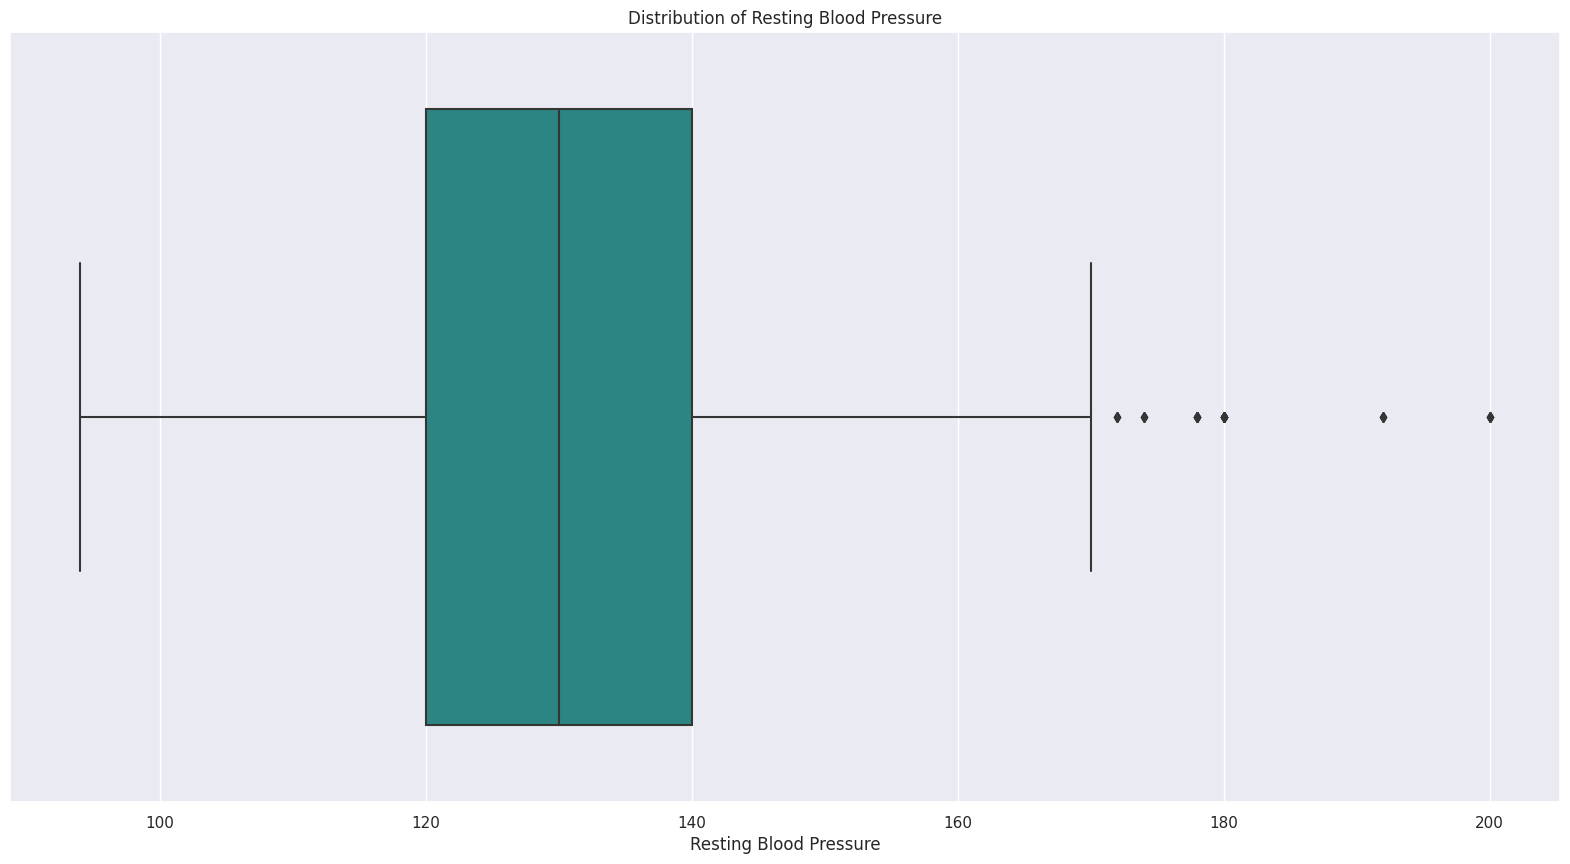

In [ ]:
# @title
sns.boxplot(data=data,x=data['trestbps'],palette="viridis",saturation=0.8)
plt.title("Distribution of Resting Blood Pressure");
plt.xlabel("Resting Blood Pressure");

Most of the **values** are distributed between **100 to 160** and there are **some outliers** (people with abruptly high blood pressures) in the data as well.

### 1.2.5 Analyzing the feature "Serum Cholestoral in mg/dl" (chol)

Plotting the distribution of Cholestrol levels in Males and Females with a line depicting the mean.

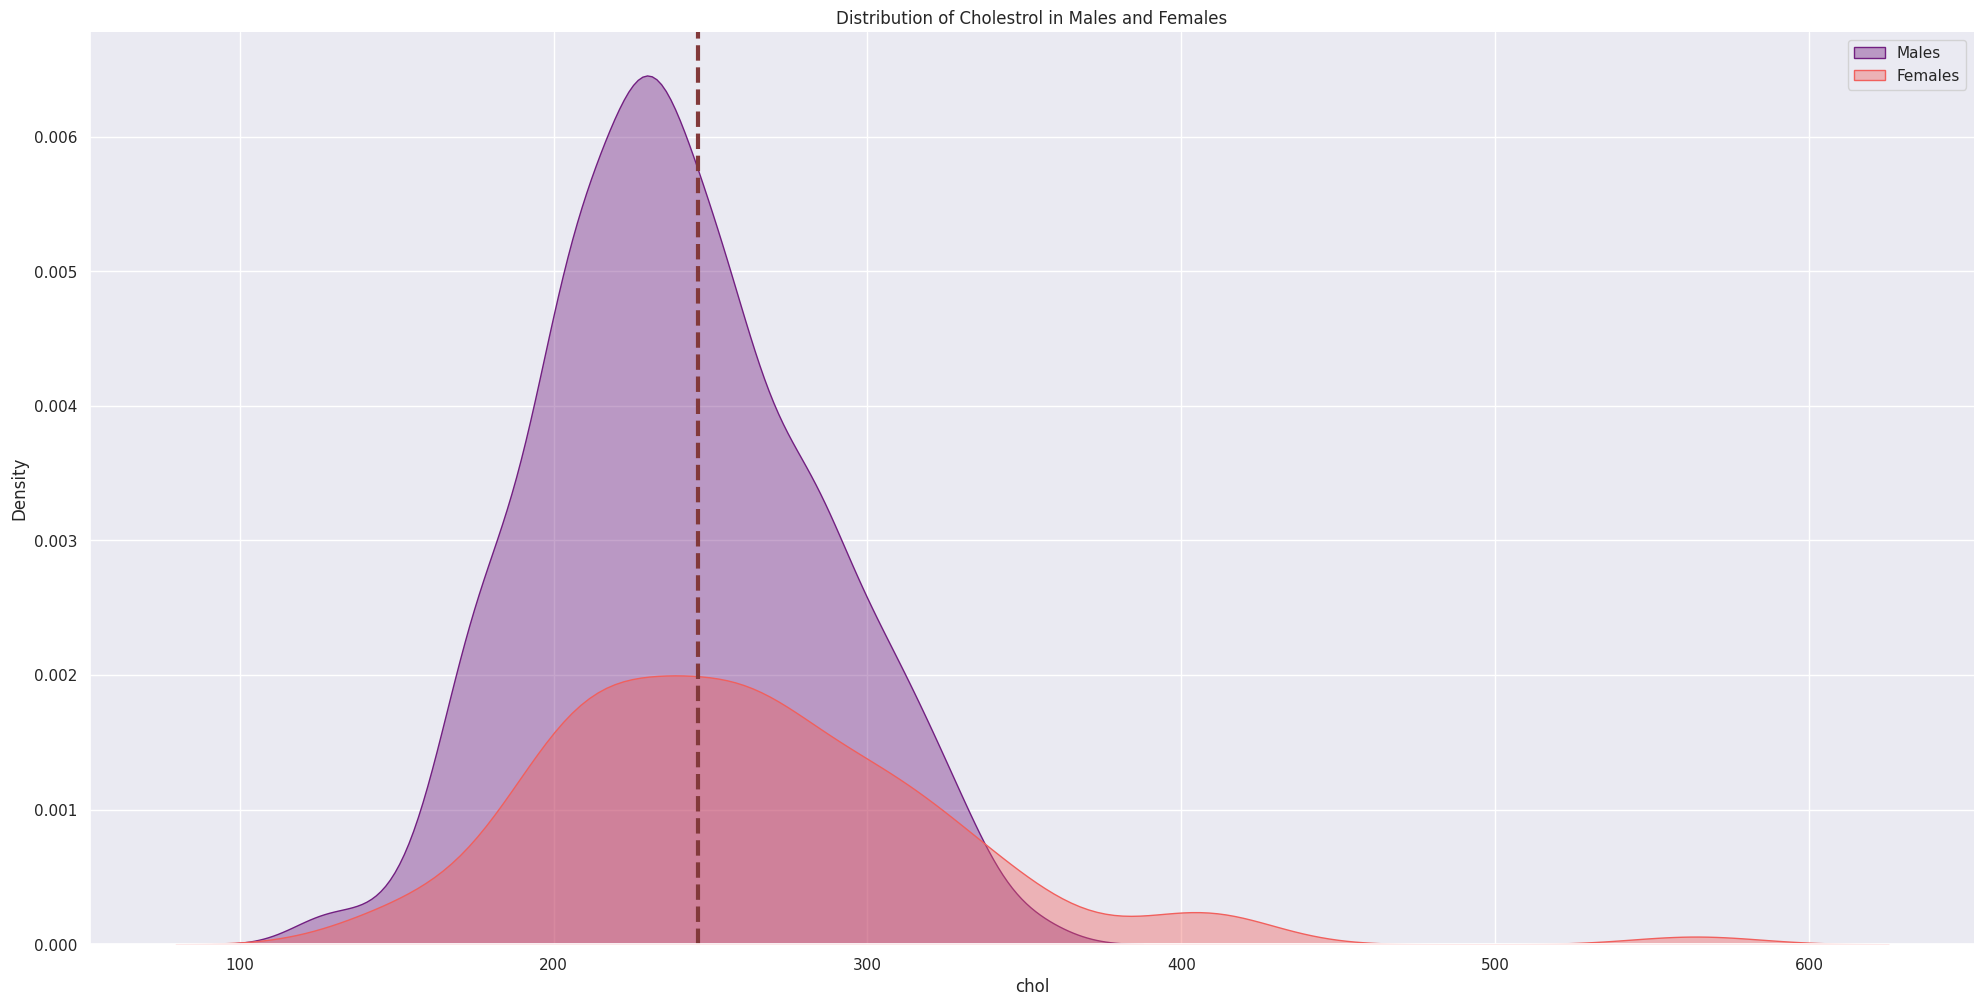

In [ ]:
# @title
sns.displot(data=data,x=data["chol"],hue="sex",palette="magma_r",alpha=0.4,legend=False,height=10,aspect=2,kind='kde',fill=True)
plt.legend(['Males','Females'])
plt.axvline(x=data["chol"].mean(), ls='--', linewidth=3, c='#82393A')
plt.title('Distribution of Cholestrol in Males and Females');

The distribution of cholestrol is **skewed positively** for **males** and follows a **normal distribution** for **females** and shows some **outlier values for female patients** with abruptly high cholestrol.

Plotting the distribution of Cholestrol using a boxplot

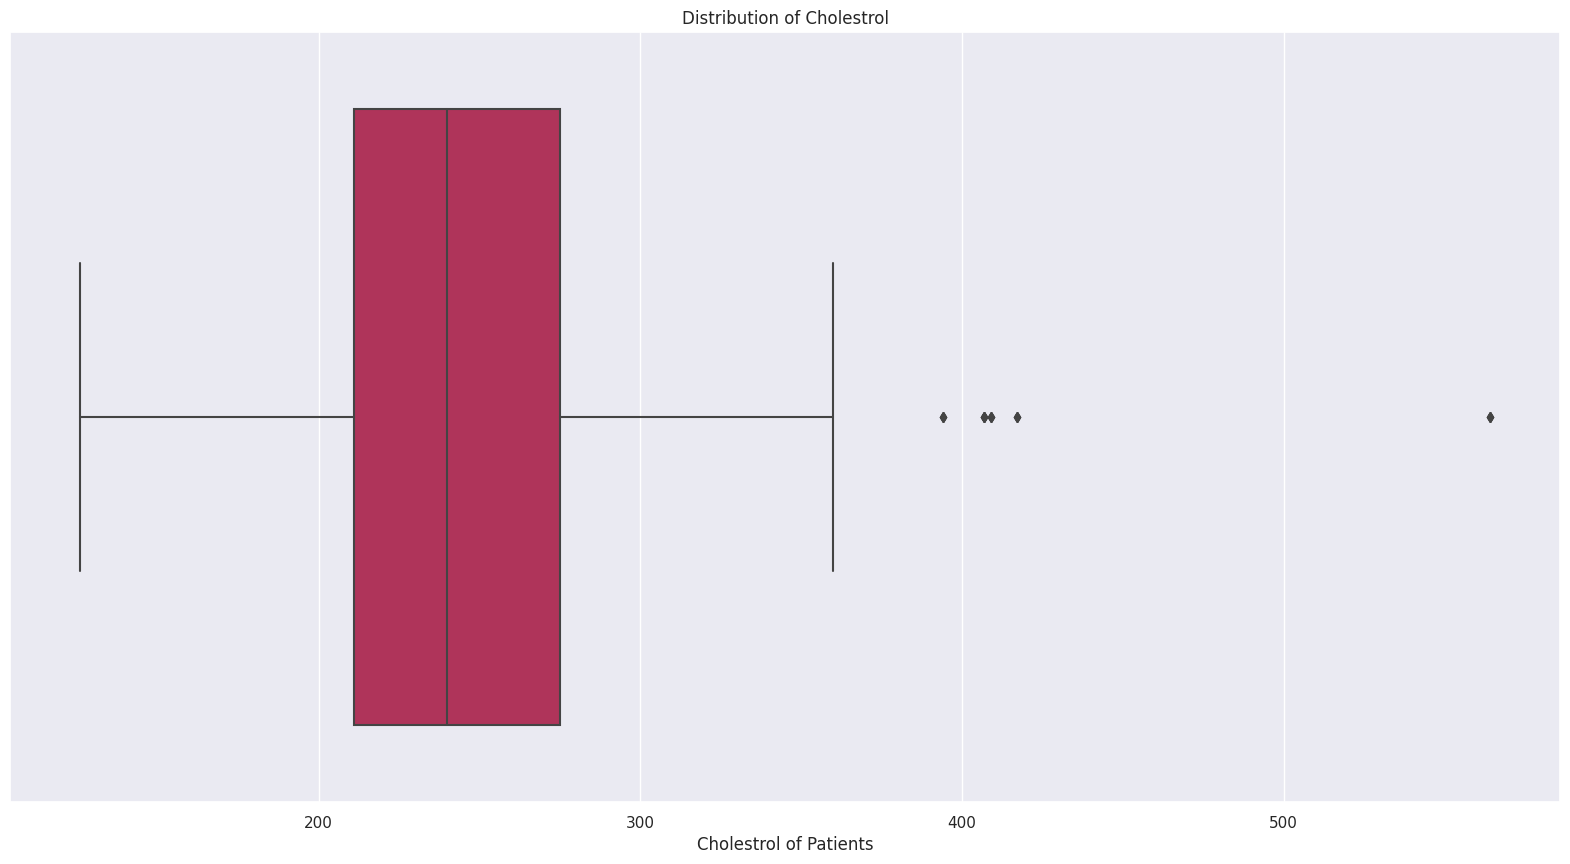

In [ ]:
# @title
sns.boxplot(data=data,x=data['chol'],palette="rocket_r",saturation=0.7)
plt.title("Distribution of Cholestrol");
plt.xlabel("Cholestrol of Patients");

Most of the cholestrol values are **distributed between 200 and 300** with **some outlier** values as well.

### 1.2.6 Analyzing the feature "Fasting Blood Sugar greater than 120mg/dl" (fbs)

In [ ]:
# @title
# def get_values(a,b):
#   new_data = data.query(f'sex == {a} and fbs == {b}')
#   return int(new_data["fbs"].value_counts().values)

# vals = []
# for i in range(0,2):
#   for j in range(0,2):
#     temp = get_values(i,j)
#     vals.append(temp)
# vals = np.array(vals)

Plotting a count plot to see how many patients have a blood sugar level greater than 120 mg/dl.

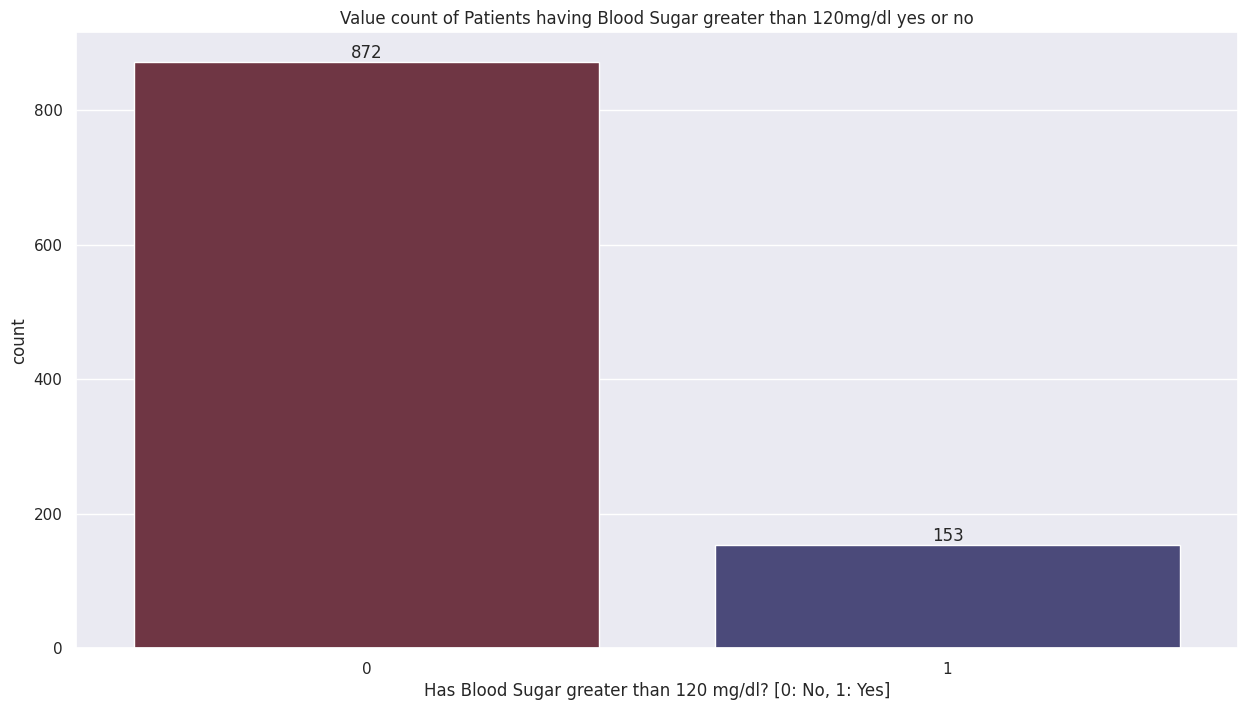

In [ ]:
# @title
plt.figure(figsize=(15,8),dpi=100)
p = sns.countplot(data=data,x=data["fbs"],palette="icefire_r")
vals = data["fbs"].value_counts().values
p.bar_label(container=p.containers[0],labels=vals)
plt.title("Value count of Patients having Blood Sugar greater than 120mg/dl yes or no")
plt.xlabel("Has Blood Sugar greater than 120 mg/dl? [0: No, 1: Yes]");

In [ ]:
# @title
no = 875/1025*100
yes = 153/1025*100
print(f" {no:.2f}% of patients don't have increased blood sugar levels")
print(f" {yes:.2f}% of patients have increased blood sugar levels")

**85.37%** of patients **don't have** increased **blood sugar levels** and
**14.93%** of patients **have** increased **blood sugar levels**.

In [ ]:
# @title


### 1.2.7 Analyzing the feature "Resting Electrocardiographic Results" (restecg)

Plotting the Count Plot for Resting Electrocardiographic Results.

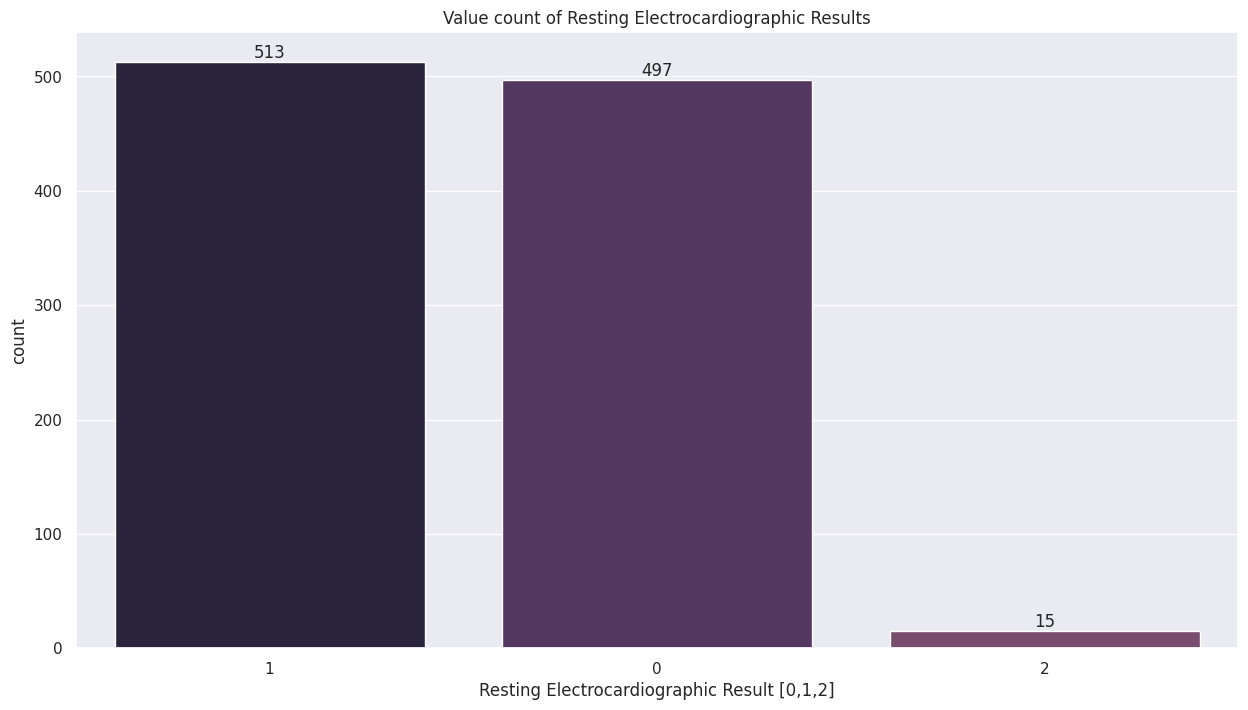

In [ ]:
# @title
plt.figure(figsize=(15,8),dpi=100)
sns.dark_palette("#69d", reverse=True, as_cmap=True)
p = sns.countplot(data=data,x=data["restecg"],order=data['restecg'].value_counts(ascending=False).index,saturation=0.4)
vals = data["restecg"].value_counts(ascending=False).values
p.bar_label(container=p.containers[0],labels=vals)
plt.title("Value count of Resting Electrocardiographic Results")
plt.xlabel("Resting Electrocardiographic Result [0,1,2]");

We observe that 1 is the most occuring value followed by 0 and 2 is the lowest. Need more info about this feature to make conclusions about its usage.

###1.2.8 Analyzing the feature "Max Heart Rate Achieved" (thalach)

Plotting the distribution of Max Heart Rate Achieved in Males and Females with a line depicting the mean.

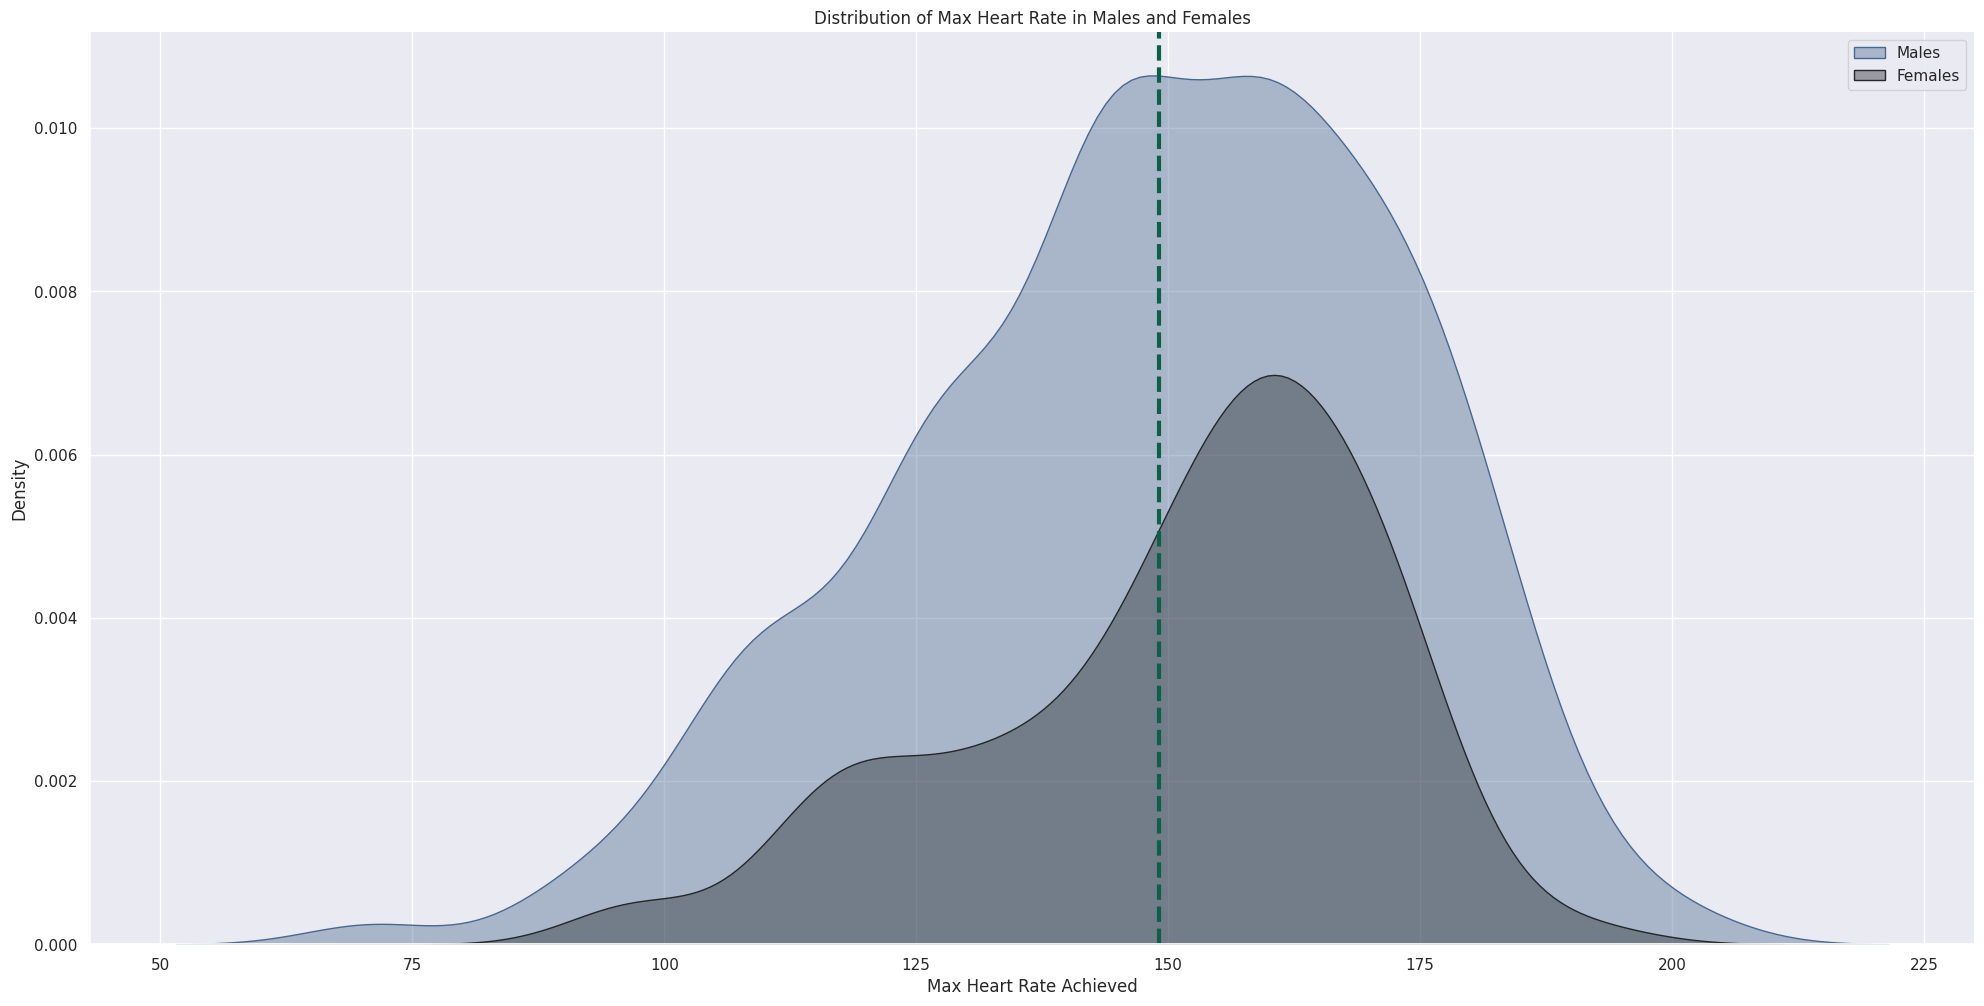

In [ ]:
# @title
sns.displot(data=data,x=data["thalach"],hue="sex",palette="dark:#496890",alpha=0.4,legend=False,height=10,aspect=2,kind='kde',fill=True)
plt.legend(['Males','Females'])
plt.axvline(x=data["thalach"].mean(), ls='--', linewidth=3, c='#0B6147')
plt.xlabel("Max Heart Rate Achieved")
plt.title('Distribution of Max Heart Rate in Males and Females');

As we can observe the data is **negatively skewed** for both Males and Females.

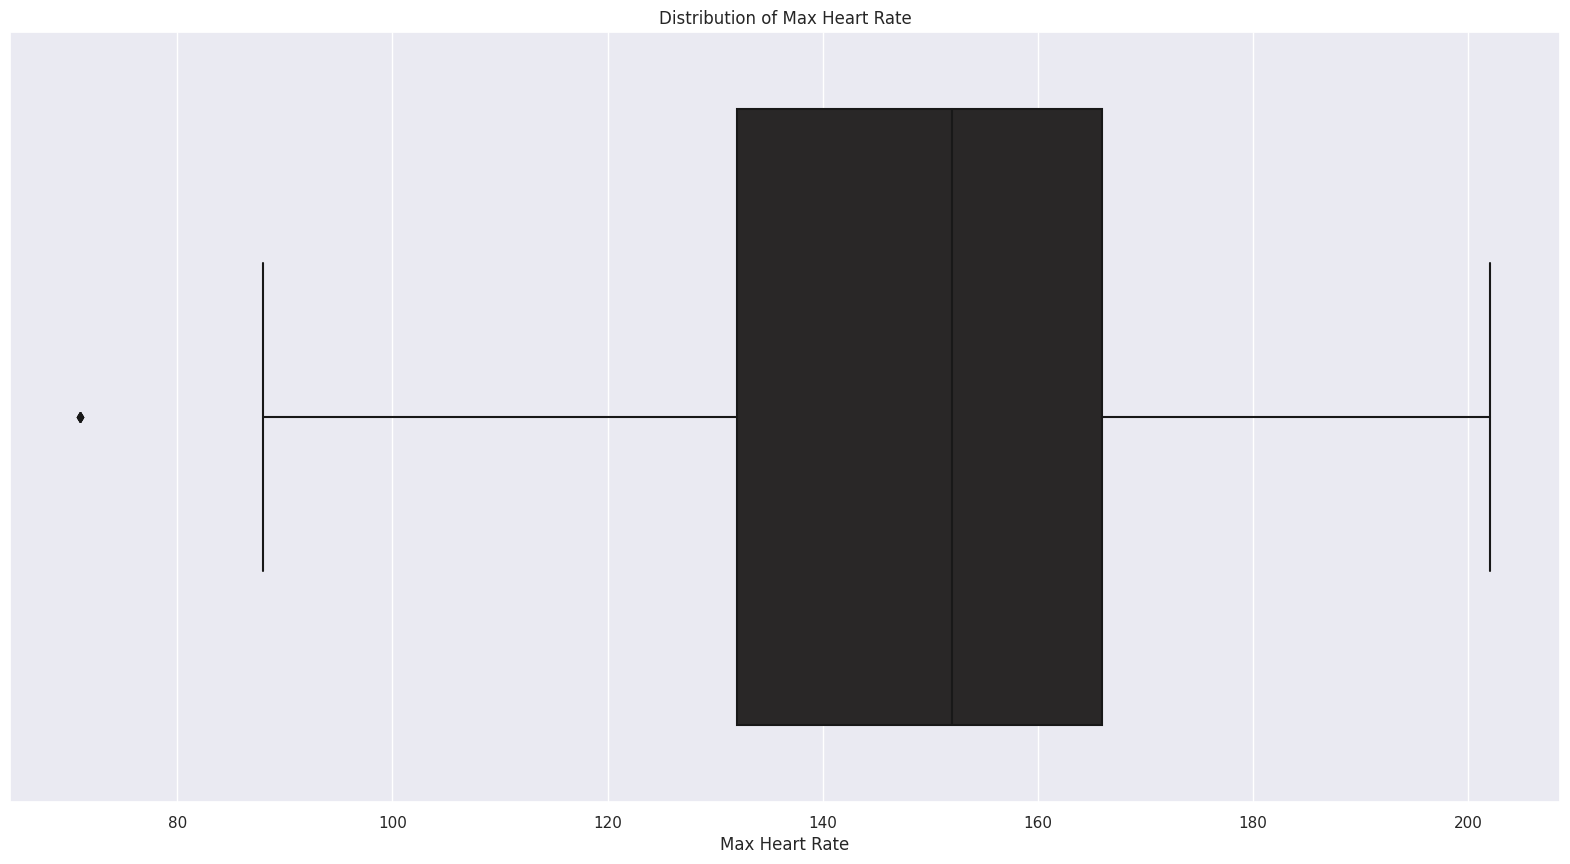

In [ ]:
# @title
sns.boxplot(data=data,x=data['thalach'],palette="dark:#531917",saturation=0.2)
plt.title("Distribution of Max Heart Rate");
plt.xlabel("Max Heart Rate");

The data is **distributed between** the **values 100 and 180** with some **outliers** (values less than 80)

### 1.2.9 Analyzing the feature "Exercise Induced Angina" (exang)

Plotting the Count Plot for Exercise Induced Angina.

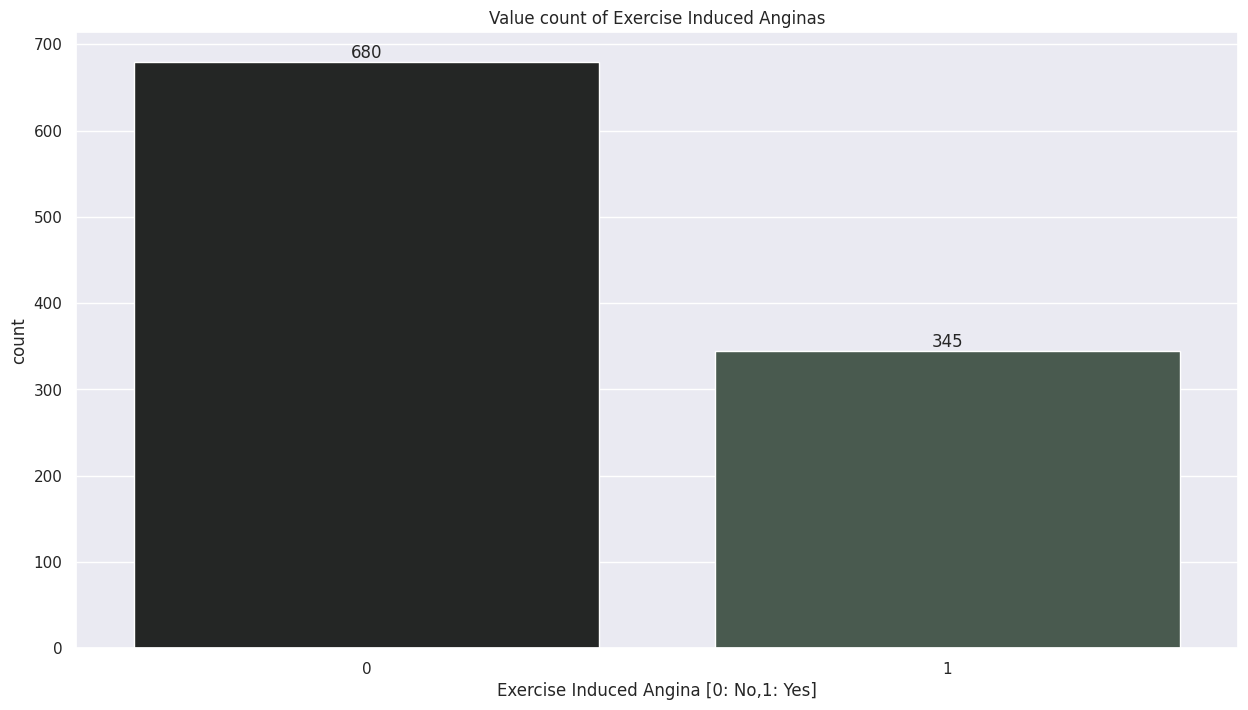

In [ ]:
# @title
plt.figure(figsize=(15,8),dpi=100)
p = sns.countplot(data=data,x=data["exang"],order=data['exang'].value_counts(ascending=False).index,saturation=0.4,palette="dark:#3D664A")
vals = data["exang"].value_counts(ascending=False).values
p.bar_label(container=p.containers[0],labels=vals)
plt.title("Value count of Exercise Induced Anginas")
plt.xlabel("Exercise Induced Angina [0: No,1: Yes]");

In [ ]:
# @title
no = 680/1025*100
yes = 345/1025*100
print(f" {no:.2f}% of patients don't have exercise induced angina")
print(f" {yes:.2f}% of patients have exercise induced angina")

**66.34%** of patients **don't have exercise induced angina** and
**33.66%** of patients **have exercise induced angina**.

### 1.2.10 Analyzing the feature "ST depression induced by exercise relative to rest" (oldpeak)

Making a count plot of ST depression induced by exercise relative to rest

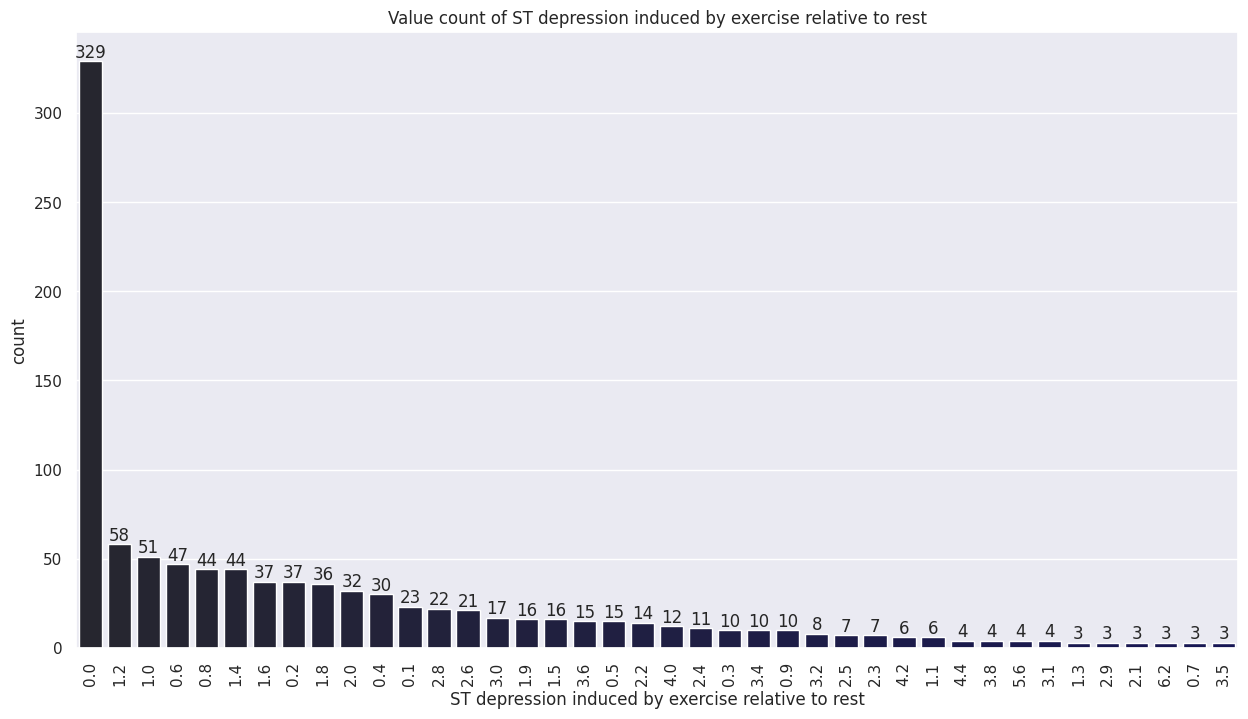

In [ ]:
# @title
plt.figure(figsize=(15,8),dpi=100)
p = sns.countplot(data=data,x=data["oldpeak"],palette="dark:#0E0D5F",order=data['oldpeak'].value_counts(ascending=False).index)
vals = data["oldpeak"].value_counts().values
p.bar_label(container=p.containers[0],labels=vals)
plt.title("Value count of ST depression induced by exercise relative to rest")
plt.xticks(rotation='vertical')
plt.xlabel("ST depression induced by exercise relative to rest");

In [ ]:
# @title
zero = 329/1025*100
print(f" {zero:.2f}% of patients have ST depression as 0")
value = np.quantile(data['oldpeak'],0.90)
print(value)

**90% of the values** lie between **0 and 2.8** and **32.10%** of the values are **zero.**

Plotting a Displot to check the same

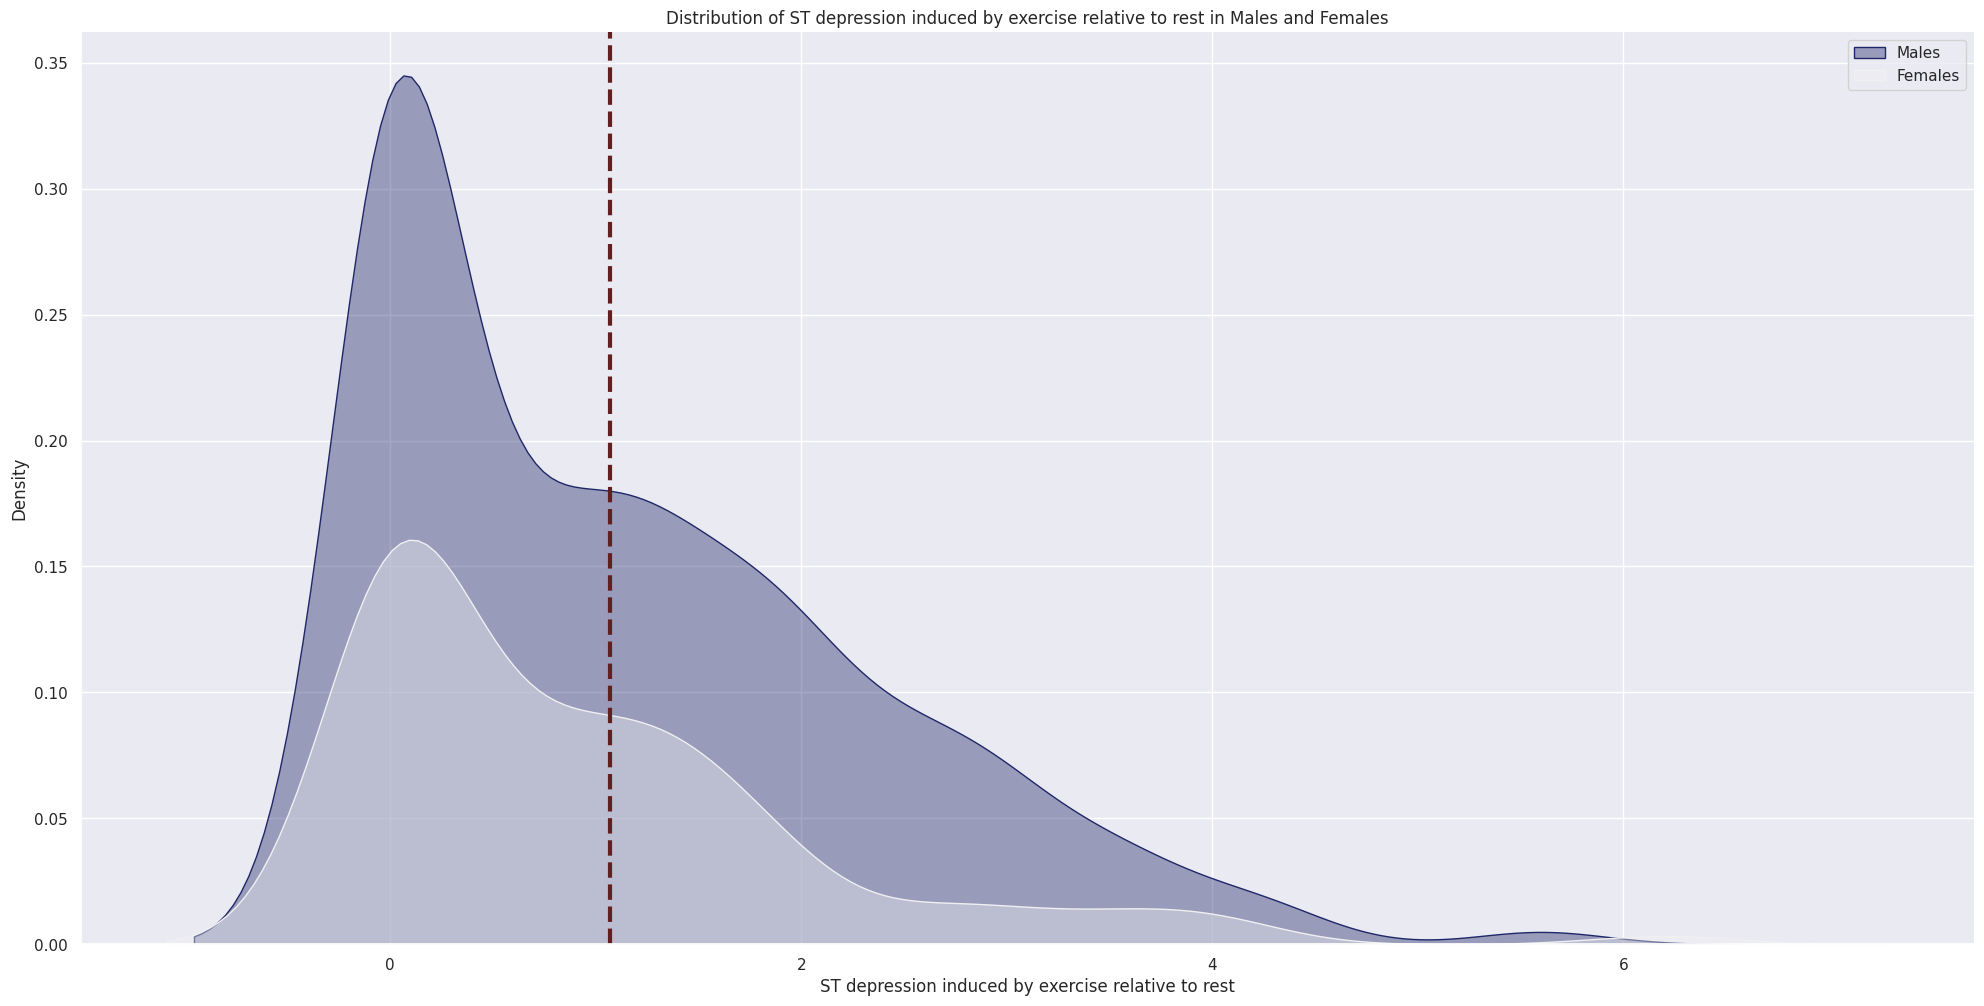

In [ ]:
# @title
sns.displot(data=data,x=data["oldpeak"],hue="sex",palette="light:#1F2768",alpha=0.4,legend=False,height=10,aspect=2,kind='kde',fill=True)
plt.legend(['Males','Females'])
plt.axvline(x=data["oldpeak"].mean(), ls='--', linewidth=3, c='#612020')
plt.xlabel("ST depression induced by exercise relative to rest")
plt.title('Distribution of ST depression induced by exercise relative to rest in Males and Females');

### 1.2.11 Analyzing the feature "Slope of the peak exercise ST segment" (slope)

Plotting the Count Plot for Slope of the peak exercise ST segment.

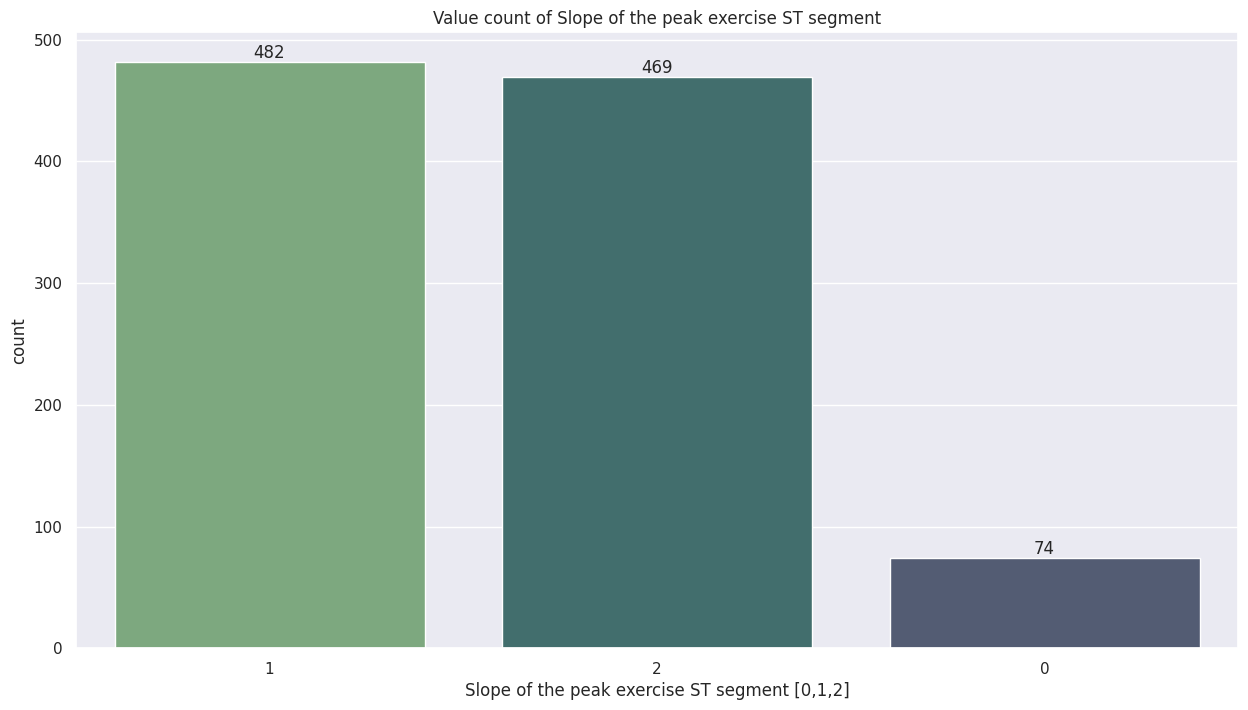

In [ ]:
# @title
plt.figure(figsize=(15,8),dpi=100)
p = sns.countplot(data=data,x=data["slope"],order=data['slope'].value_counts(ascending=False).index,saturation=0.4,palette="viridis_r")
vals = data["slope"].value_counts(ascending=False).values
p.bar_label(container=p.containers[0],labels=vals)
plt.title("Value count of Slope of the peak exercise ST segment")
plt.xlabel("Slope of the peak exercise ST segment [0,1,2]");

In [ ]:
# @title
one = 482/1025*100
two = 469/1025*100
three = 74/1025*100
print(f" {one:.2f}% of patients have slope as 1")
print(f" {two:.2f}% of patients have have slope as 2")
print(f" {three:.2f}% of patients have have slope as 0")

**47.02%** of patients have **slope as 1**,
**45.76%** of patients have **slope as 2** and
**7.22%** of patients have **slope as 0**

### 1.2.12 Analyzing the feature "Number of major vessels (0-3) colored by flourosopy" (ca)

Plotting the Count Plot for Number of major vessels (0-3) colored by flourosopy.

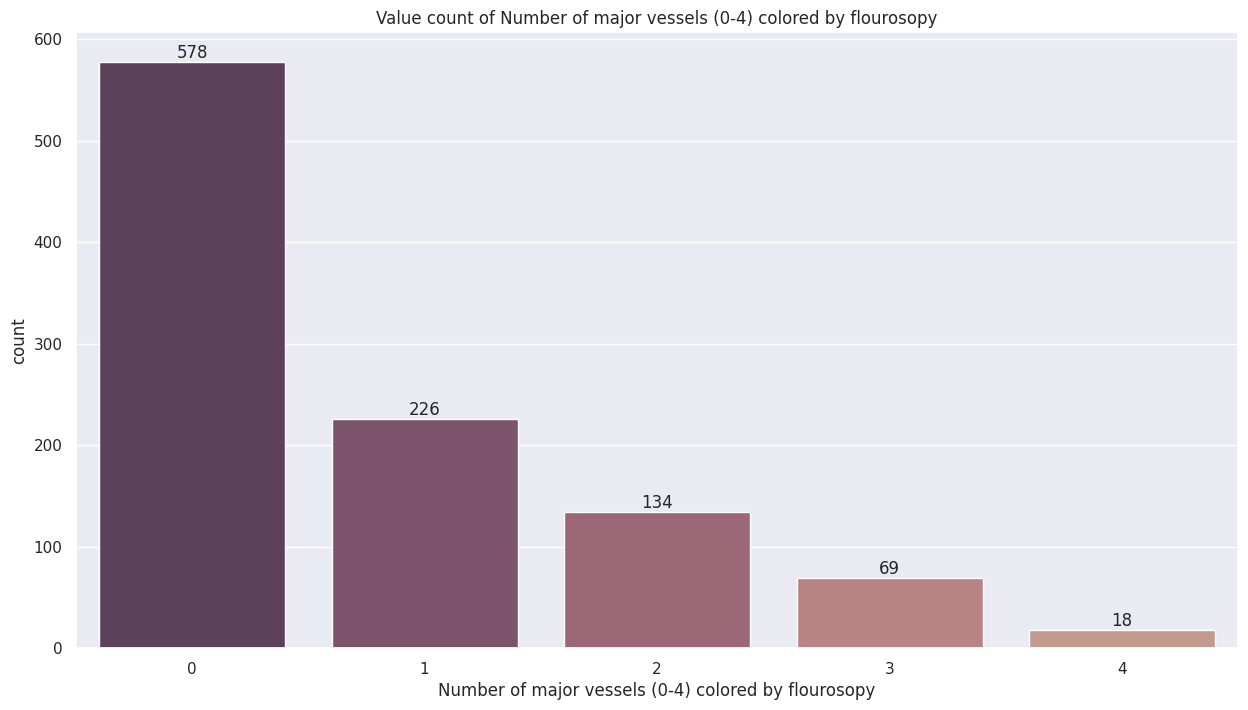

In [ ]:
# @title
plt.figure(figsize=(15,8),dpi=100)
p = sns.countplot(data=data,x=data["ca"],order=data['ca'].value_counts(ascending=False).index,saturation=0.4,palette="flare_r")
vals = data["ca"].value_counts(ascending=False).values
p.bar_label(container=p.containers[0],labels=vals)
plt.title("Value count of Number of major vessels (0-4) colored by flourosopy")
plt.xlabel("Number of major vessels (0-4) colored by flourosopy");

In [ ]:
# @title
one = 578/1025*100
two = 226/1025*100
three = 134/1025*100
four = 69/1025*100
five = 18/1025*100
print(f" {one:.2f}% of patients have 0 vessels colored")
print(f" {two:.2f}% of patients have 1 vessels colored")
print(f" {three:.2f}% of patients have 2 vessels colored")
print(f" {four:.2f}% of patients have 3 vessels colored")
print(f" {five:.2f}% of patients have 4 vessels colored")

**56.39%** of patients have **0 vessels colored**  
**22.05%** of patients have **1 vessel colored**  
**13.07%** of patients have **2 vessels colored**  
**6.73%** of patients have **3 vessels colored**  
**1.76%** of patients have **4 vessels colored**

### 1.2.13 Analyzing the feature "Thal : 1 = normal; 2 = fixed defect; 3 = reversable defect" (thal)

Plotting the Count Plot for Thal : 1 = normal; 2 = fixed defect; 3 = reversable defect

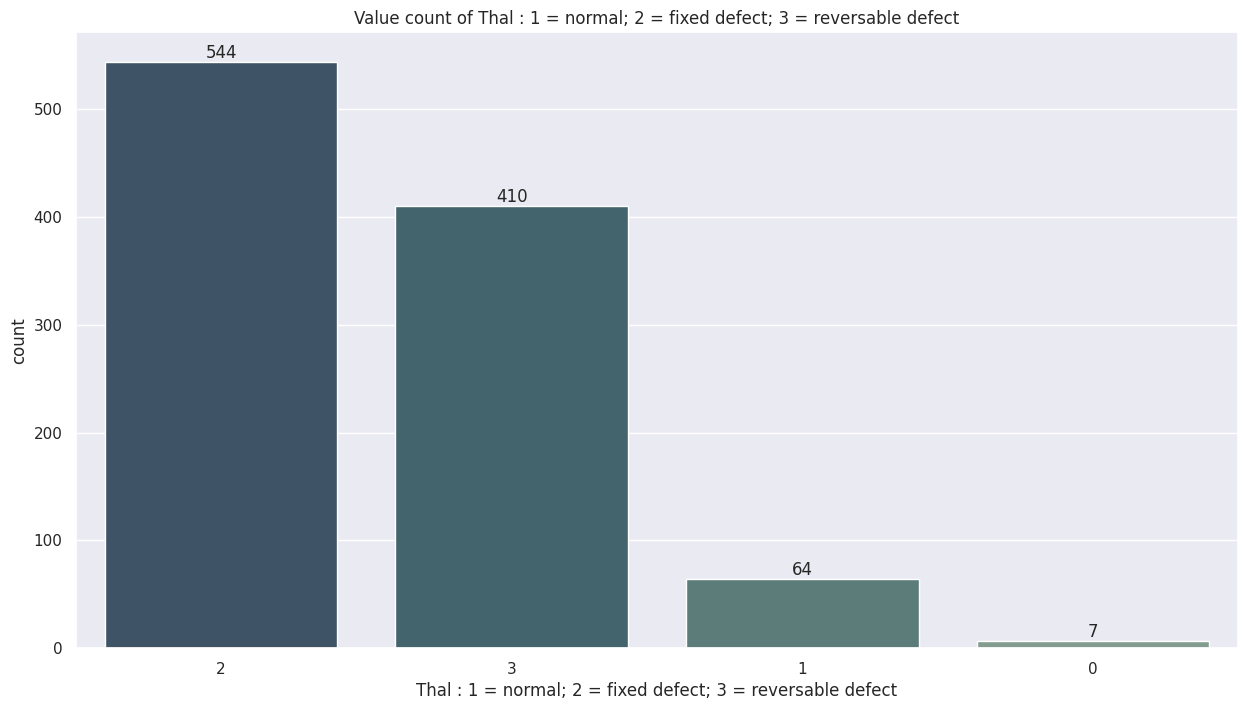

In [ ]:
# @title
plt.figure(figsize=(15,8),dpi=100)
p = sns.countplot(data=data,x=data["thal"],order=data['thal'].value_counts(ascending=False).index,saturation=0.4,palette="crest_r")
vals = data["thal"].value_counts(ascending=False).values
p.bar_label(container=p.containers[0],labels=vals)
plt.title("Value count of Thal : 1 = normal; 2 = fixed defect; 3 = reversable defect")
plt.xlabel("Thal : 1 = normal; 2 = fixed defect; 3 = reversable defect");

In [ ]:
# @title
one = 544/1025*100
two = 410/1025*100
three = 64/1025*100
four = 7/1025*100
print(f" {one:.2f}% of patients have fixed defect thal: 2")
print(f" {two:.2f}% of patients have reversible defect thal: 3")
print(f" {three:.2f}% of patients have normal thal: 1")
print(f" {four:.2f}% of values are 0")

 **53.07%** of patients have **fixed defect thal: 2**  
**40.00%** of patients have **reversible defect thal: 3**  
 **6.24%** of patients have **normal thal: 1**  
**0.68%** of **values are 0**

### 1.2.14 Analyzing the target feature "The Patient has Heart Disease or not? 0: No, 1: Yes" (target)



Plotting the Count Plot for The Patient has Heart Disease or not? 0: No, 1: Yes

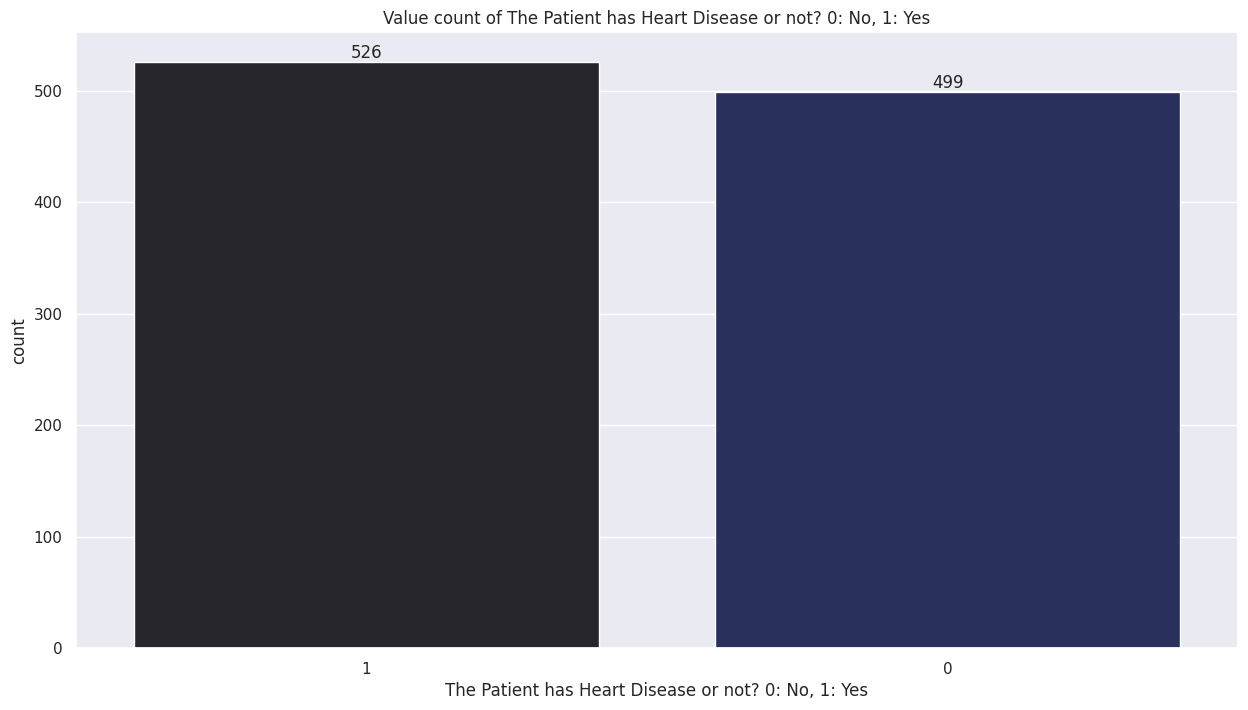

In [ ]:
# @title
plt.figure(figsize=(15,8),dpi=100)
p = sns.countplot(data=data,x=data["target"],order=data['target'].value_counts(ascending=False).index,saturation=0.7,palette="dark:#1F2768")
vals = data["target"].value_counts(ascending=False).values
p.bar_label(container=p.containers[0],labels=vals)
plt.title("Value count of The Patient has Heart Disease or not? 0: No, 1: Yes")
plt.xlabel("The Patient has Heart Disease or not? 0: No, 1: Yes");

In [ ]:
# @title
yes = 526/1025*100
no = 499/1025*100
print(f" {yes:.2f}% of patients have a Heart Disease")
print(f" {no:.2f}% of patients don't have a Heart Disease")

 **51.32%** of patients **have a Heart Disease**  
 **48.68%** of patients **don't have a Heart Disease**

## 1.3 Exploratory Data Analysis Bi-variate and Multi-variate

In this section we will do **bi-variate and multi-variate analysis** of different features with our **target feature**. What we're looking for is **how or to what degree** these **features affect or change our target variable** to ensure we're using the right ones in our model.

### 1.3.1 Analyzing Correlation of features

Plotting a correlation matrix using `data.corr()` function.

In [ ]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


As we can see this becomes a little diffcult to read, hence, we plot this using `sns.heatmap()`

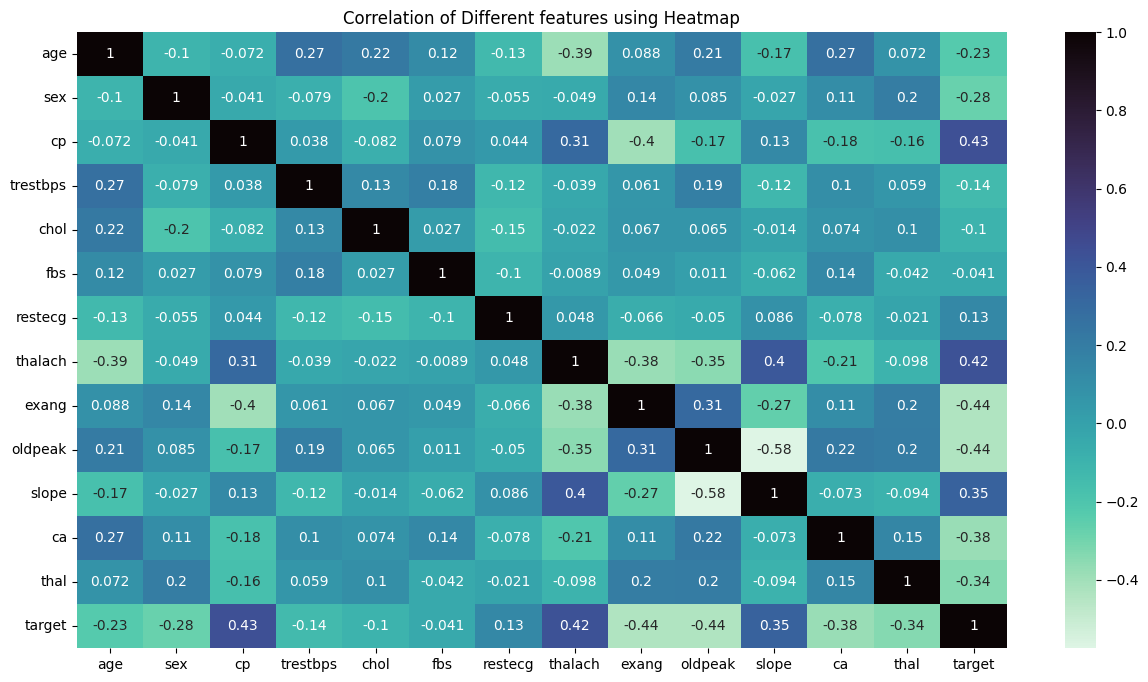

In [ ]:
# @title
plt.figure(figsize=(15,8),dpi=100)
sns.heatmap(data.corr(),cmap='mako_r',annot=True)
plt.title("Correlation of Different features using Heatmap");

Reading the Heatmap, we find the below observations:  
1.   **Age** is ***slightly negatively*** correlated with target.
2.   **Sex** is ***slightly negatively*** correlated with target.
3.   **Chest Pain** is ***highly correlated*** with target.
4.   **Resting Blood Pressure** is ***slightly negatively*** correlated with target.
5.   **Cholestrol** is is ***slightly negatively*** correlated with target.
6.   **Blood Sugar** is is ***slightly negatively*** correlated with target.
7.   **Rest ECG** is ***moderately*** correlated with target.
8.   **Max Heart Rate** is ***highly correlated*** with target.
9.   **Exercise Angina** is ***highly negatively correlated*** with target.
10.  **ST Depression** is ***highly negatively correlated*** with target.
11.  **Slope of ST** is **highly correlated** with target.
12.  **No. of Colored Vessels** is ***highly negatively correlated*** with target.
13.  **Thal** is ***highly negatively correlated*** with target.


### 1.3.2 Analyzing Age vs Cholestrol features with target

Let's analyze how Age vs Cholestrol Levels are distributed in terms of having a Heart Disease

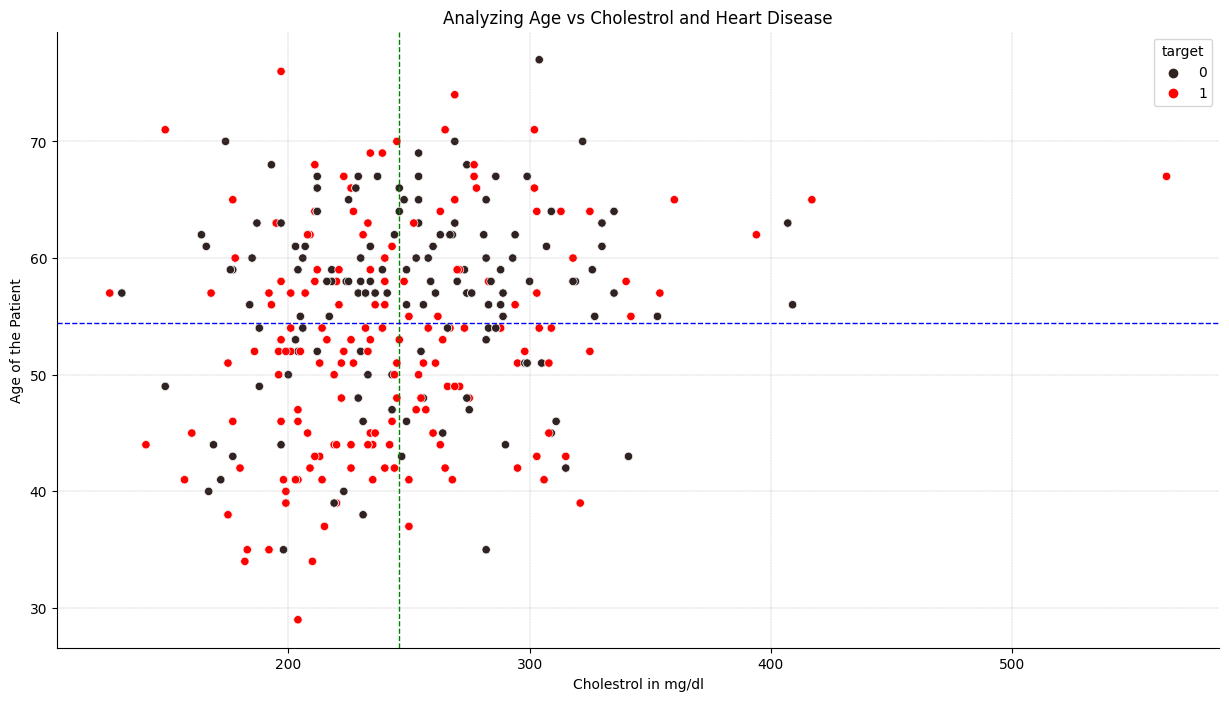

In [ ]:
# @title
f = plt.figure(figsize=(15,8),dpi=100)
plt.title("Analyzing Age vs Cholestrol and Heart Disease")
plt.xlabel("Cholestrol in mg/dl")
plt.ylabel("Age of the Patient")
sns.scatterplot(data=data,x='chol',y='age',hue='target',palette='dark:red')
sns.despine(f,top=True,right=True)
plt.grid(color='grey',linewidth=0.2,ls='--',ds='steps')
plt.axvline(data['chol'].mean(),ls='--',color='green',linewidth=1)
plt.axhline(data['age'].mean(),ls='--',color='blue',linewidth=1);

It's clearly visible that people having:

1.  **Cholestrol** **between 150 and 350**
2.  **Age** **between 40 and 70**

Are **mostly** having **a Heart Disease**. It also strengthens the assumption that Age and Cholestrol levels influence our target variable.

### 1.3.3 Analyzing Max Heart Rate vs Resting Blood Pressure with target

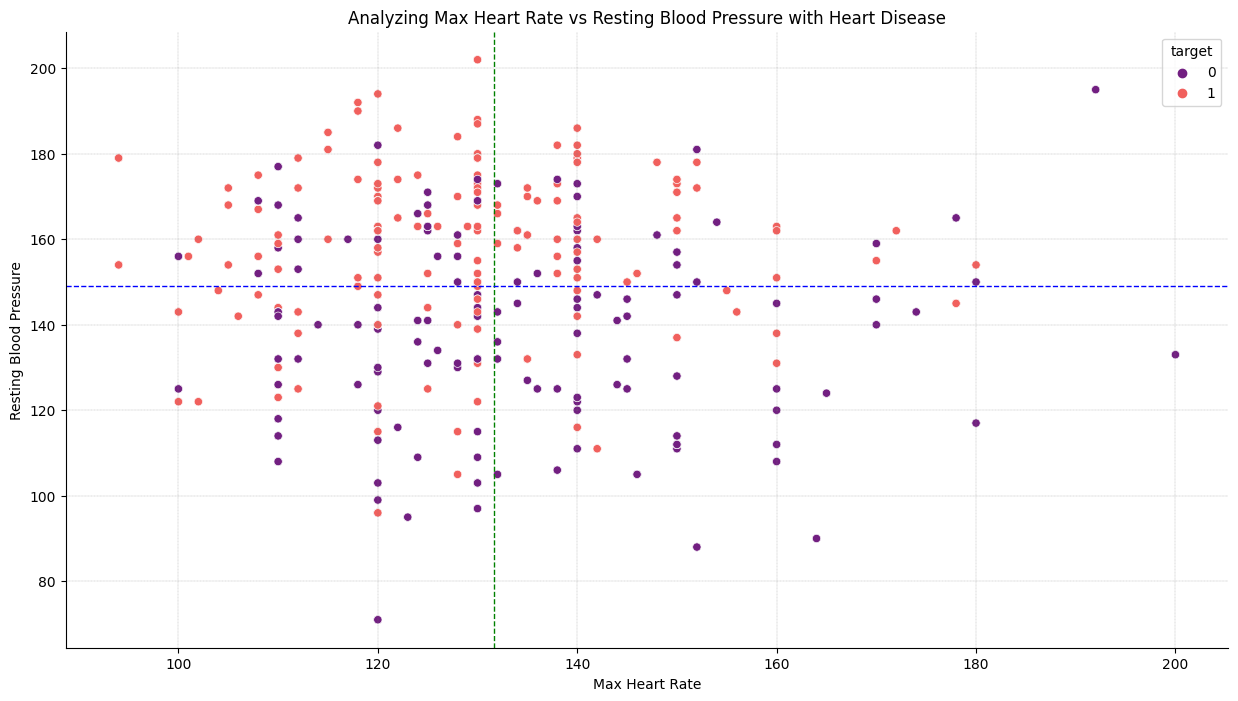

In [ ]:
# @title
f = plt.figure(figsize=(15,8),dpi=100)
plt.title("Analyzing Max Heart Rate vs Resting Blood Pressure with Heart Disease")
plt.xlabel("Max Heart Rate")
plt.ylabel("Resting Blood Pressure")
sns.scatterplot(data=data,x='trestbps',y='thalach',hue='target',palette='magma')
sns.despine(f,top=True,right=True)
plt.grid(color='grey',linewidth=0.2,ls='--',ds='steps')
plt.axvline(data['trestbps'].mean(),ls='--',color='green',linewidth=1)
plt.axhline(data['thalach'].mean(),ls='--',color='blue',linewidth=1);

It is observed from the chart that:

1.  If **Max Heart Rate is more than 100**
2.  And **Blood Pressure is more than 140**

**Most** of the **patients** are having a **Heart Disease**.

### 1.3.4 Analyzing Cholestrol with Max Heart Rate and target

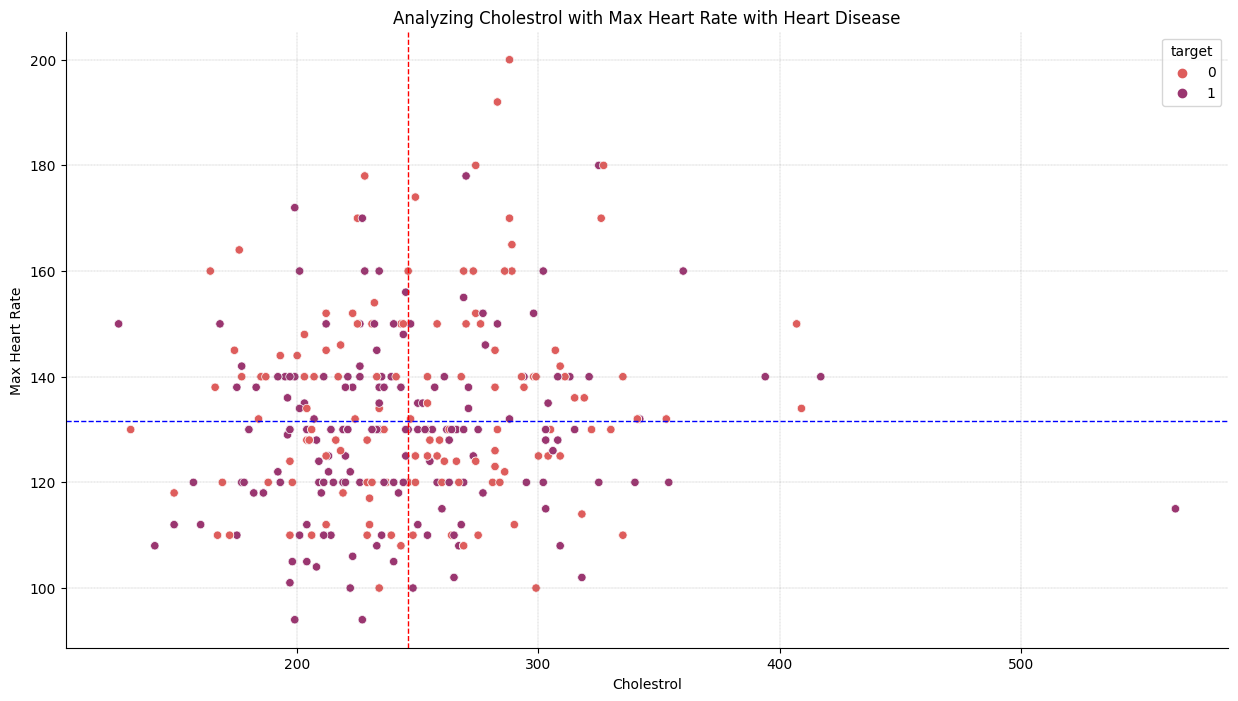

In [ ]:
# @title
f = plt.figure(figsize=(15,8),dpi=100)
plt.title("Analyzing Cholestrol with Max Heart Rate with Heart Disease")
plt.xlabel("Cholestrol")
plt.ylabel("Max Heart Rate")
sns.scatterplot(data=data,x='chol',y='trestbps',hue='target',palette='flare')
sns.despine(f,top=True,right=True)
plt.grid(color='grey',linewidth=0.2,ls='--',ds='steps')
plt.axvline(data['chol'].mean(),ls='--',color='red',linewidth=1)
plt.axhline(data['trestbps'].mean(),ls='--',color='blue',linewidth=1);

It is again observed that if:
1.  **Max Heart Rate more than 100**
2.  and **Cholestrol level between 150 to 350**
**Most patients** are suffering from **Heart Disease**.
It also strengthens the assumption that Max Heart Rate and Cholestrol are correlated with target variable.

## 1.4 Feature Engineering: Transformations and Selection

### 1.4.1 Scaling values

As we have observed different kinds of information are having various data which are on different scales, thus it becomes important to scale the data on a common denominator so that further analysis can be performed.

In [ ]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
temp_data = data.drop('target',axis=1)
scaled_data = rb.fit_transform(temp_data)
scaled_data = pd.DataFrame(scaled_data,columns=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'])

Checking the scaled data using `scaled_data.head()`

In [ ]:
# @title
scaled_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.307692,0.0,-0.5,-0.25,-0.437500,0.0,0.0,0.470588,0.0,0.111111,1.0,2.0,1.0,-1.0
1,-0.230769,0.0,-0.5,0.50,-0.578125,1.0,-1.0,0.088235,1.0,1.277778,-1.0,0.0,1.0,-1.0
2,1.076923,0.0,-0.5,0.75,-1.031250,0.0,0.0,-0.794118,1.0,1.000000,-1.0,0.0,1.0,-1.0
3,0.384615,0.0,-0.5,0.90,-0.578125,0.0,0.0,0.264706,0.0,-0.444444,1.0,1.0,1.0,-1.0
4,0.461538,-1.0,-0.5,0.40,0.843750,1.0,0.0,-1.352941,0.0,0.611111,0.0,3.0,0.0,-1.0


Statistical Info about the scaled data using `scaled_data.describe()`

In [ ]:
# @title
scaled_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,-0.120450,-0.304390,-0.02878,0.080585,0.093750,0.149268,-0.470244,-0.084878,0.336585,0.150840,0.385366,0.754146,0.323902,-0.486829
std,0.697868,0.460373,0.51482,0.875836,0.806133,0.356527,0.527878,0.676639,0.472772,0.652807,0.617755,1.030798,0.620660,0.500070
min,-2.076923,-1.000000,-0.50000,-1.800000,-1.781250,0.000000,-1.000000,-2.382353,0.000000,-0.444444,-1.000000,0.000000,-2.000000,-1.000000
25%,-0.615385,-1.000000,-0.50000,-0.500000,-0.453125,0.000000,-1.000000,-0.588235,0.000000,-0.444444,0.000000,0.000000,0.000000,-1.000000
50%,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.384615,0.000000,0.50000,0.500000,0.546875,0.000000,0.000000,0.411765,1.000000,0.555556,1.000000,1.000000,1.000000,0.000000
max,1.615385,0.000000,1.00000,3.500000,5.062500,1.000000,1.000000,1.470588,1.000000,3.000000,1.000000,4.000000,1.000000,0.000000


### 1.4.2 Recitfying feature types

We know that some of these features are purely numerical and others are purely categorical. Hence, we need to set the feature type so that our model takes it apporpriately.

In [ ]:
scaled_data = scaled_data.astype({'age':float, 'sex':object, 'cp':object, 'trestbps':float, 'chol':float, 'fbs':object, 'restecg':object, 'thalach':float,
       'exang':object, 'oldpeak':object, 'slope':object, 'ca':object, 'thal':object})

In [ ]:
scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   float64
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   object 
 3   trestbps  1025 non-null   float64
 4   chol      1025 non-null   float64
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   float64
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   object 
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   object 
 12  thal      1025 non-null   object 
 13  target    1025 non-null   object 
dtypes: float64(4), object(10)
memory usage: 112.2+ KB


### 1.4.3 Feature Selection

Getting the best features for our model using Chi-square test and SelectKBest method in Sci-Kit Learn.

In [ ]:
# @title
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.drop('target',axis=1)
y = data['target']
best_features = SelectKBest(score_func=chi2,k=10).fit(X,y)
scores = best_features.scores_
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']
emp_dict = {}
for i in range(0,len(columns)):
  print(f"Score of Feature {columns[i]} : {scores[i]:.2f}")
  emp_dict.update({columns[i]:scores[i]})

**Score of Feature age : 81.43**  
Score of Feature sex : 24.37  
**Score of Feature cp : 217.82**   
Score of Feature trestbps : 45.97  
**Score of Feature chol : 110.72**   
Score of Feature fbs : 1.48  
Score of Feature restecg : 9.74  
**Score of Feature thalach : 650.01**  
**Score of Feature exang : 130.47**  
**Score of Feature oldpeak : 253.65**  
Score of Feature slope : 33.67  
**Score of Feature ca : 210.63**  
Score of Feature thal : 19.37  

Hence, the most important features for model building are:  
*  'age'  
* 'chol',  
*  'exang',  
*  'ca',  
*  'cp',  
*  'oldpeak',  
*  'thalach'

and other usable features would be:
* 'trestbps'
* 'slope'

In [ ]:
# @title
new_dict = dict(sorted(emp_dict.items(), key=lambda item: item[1]))

### 1.4.4 Splitting the data into Train and Test

Here, we will filter out to include only those features which have the highest importance score, as mentioned above.

In [ ]:
X = scaled_data[['age', 'cp', 'trestbps', 'chol', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca']]
y = data[['target']]

Splitting the data using Sci-Kit Learn's `train_test_split` method

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=25)

## 1.5 Model Building, Evaluation and Parameter Tuning

### 1.5.1 Constructing an Artificial Neural Network using TensorFlow

Learn more about ANN here: https://towardsdatascience.com/applied-deep-learning-part-1-artificial-neural-networks-d7834f67a4f6

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

#building layers of neural network
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu',input_dim = 9,
                      kernel_initializer = "uniform"),
    keras.layers.Dense(14,activation='relu',
                     kernel_initializer = "uniform"),
    keras.layers.Dense(1,activation='relu',
                     kernel_initializer = "uniform"),
    keras.layers.Dense(1, activation='sigmoid',kernel_initializer = "uniform")
])

# Compiling the model
model.compile(optimizer='adam',
              #loss=keras.losses.SparseCategoricalCrossentropy(),
              loss='binary_crossentropy',
              metrics=['accuracy'])
#X_tensor = np.column_stack((X_train,y_train))
X_train = np.asarray(X_train).astype('float32')
y_train =  np.asarray(y_train).astype('float32')
# fitting the model
model.fit(X_train, y_train, epochs=100, batch_size=10)

Epoch 1/100
72/72 [==============================] - 2s 3ms/step - loss: 0.6926 - accuracy: 0.5174
Epoch 2/100
72/72 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.5202
Epoch 3/100
72/72 [==============================] - 0s 3ms/step - loss: 0.5846 - accuracy: 0.7894
Epoch 4/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.8187
Epoch 5/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5463 - accuracy: 0.8215
Epoch 6/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.8410
Epoch 7/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.8382
Epoch 8/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.8340
Epoch 9/100
72/72 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.8410
Epoch 10/100
72/72 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.8466
Epoch 11/

### 1.5.2 Evaluating the model's accuracy score

Using Accruacy Score:

In [ ]:
#evaluating the model
X_test = np.asarray(X_test).astype('float32')
y_test =  np.asarray(y_test).astype('float32')
model.evaluate(X_test, y_test, batch_size=10)

31/31 [==============================] - 0s 1ms/step - loss: 0.1619 - accuracy: 0.9578


[0.16189435124397278, 0.9577922224998474]

The model gives an **accuracy** of **95.78%**

In [ ]:
# @title
preds = model.predict(X_test)
preds = (preds>0.5)

In [ ]:
# @title
y_test = (y_test==1)
print(y_test.shape)
print(preds.shape)

Using Confusion Matrix:

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,preds)

The confusion matrix created is as follows:

[ 154   ,  1 ]   
       [ 12 ,  141 ]

### 1.5.3 Visualizing our Predictions:

In [ ]:
# @title
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()

In [ ]:
# @title
temp_data = data.copy()

In [ ]:
# @title
X = np.asarray(X).astype('float32')
p = model.predict(X)
p = (p>0.5)
p_final = lb.fit_transform(p)
temp_data["new_target"] = p_final

Constructing a scatter plot using `sns.scatterplot()` between Age and Cholestrol where the coloring factor or `hue` is Heart Disease.

*    On the left are those patients who are **actually having the disease** as mentioned in the dataset. (**red dots**)
*   On the right are those which are **predicted by our model** to have a Heart Condition. (**blue dots**)

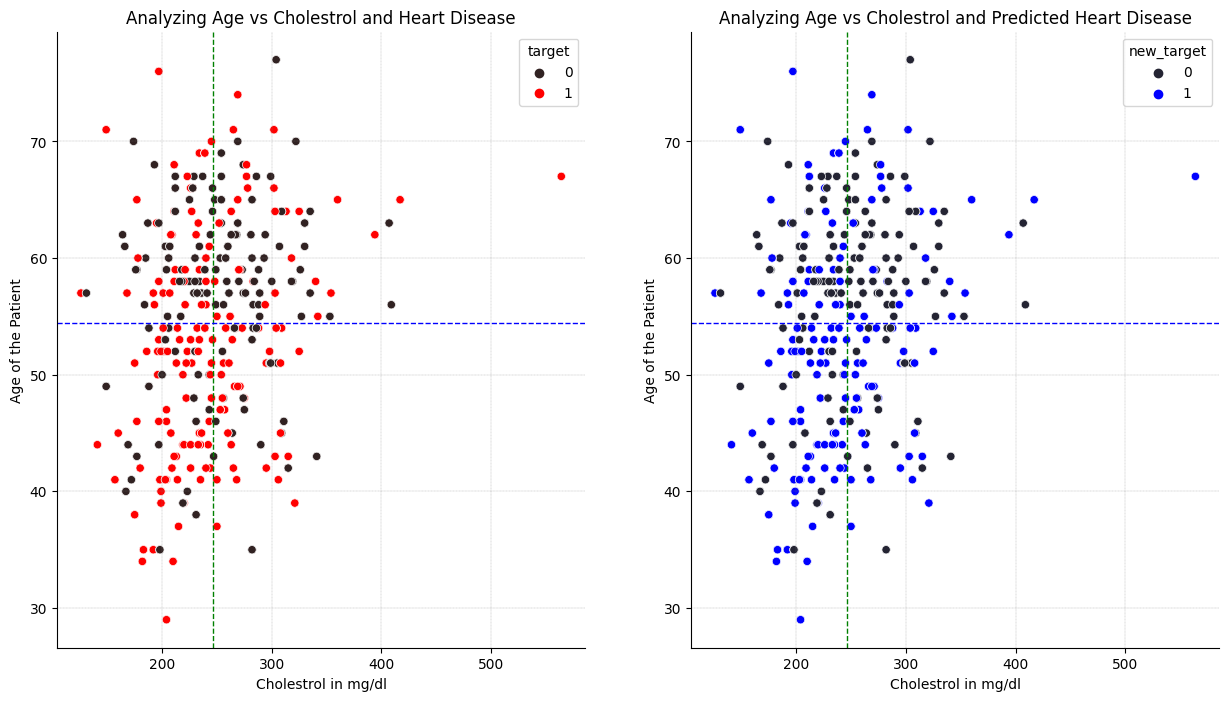

In [ ]:
# @title
f = plt.figure(figsize=(15,8),dpi=100)
plt.subplot(1,2,1)
plt.title("Analyzing Age vs Cholestrol and Heart Disease")
plt.xlabel("Cholestrol in mg/dl")
plt.ylabel("Age of the Patient")
sns.scatterplot(data=temp_data,x='chol',y='age',hue='target',palette='dark:red')
sns.despine(f,top=True,right=True)
plt.grid(color='grey',linewidth=0.2,ls='--',ds='steps')
plt.axvline(temp_data['chol'].mean(),ls='--',color='green',linewidth=1)
plt.axhline(temp_data['age'].mean(),ls='--',color='blue',linewidth=1);
plt.subplot(1,2,2)
plt.title("Analyzing Age vs Cholestrol and Predicted Heart Disease")
plt.xlabel("Cholestrol in mg/dl")
plt.ylabel("Age of the Patient")
sns.scatterplot(data=temp_data,x='chol',y='age',hue='new_target',palette='dark:blue')
sns.despine(f,top=True,right=True)
plt.grid(color='grey',linewidth=0.2,ls='--',ds='steps')
plt.axvline(temp_data['chol'].mean(),ls='--',color='green',linewidth=1)
plt.axhline(temp_data['age'].mean(),ls='--',color='blue',linewidth=1);